In [1]:
#OLÁAAA

# Text Mining Project

Text Mining project


In [558]:


#ola


In [3]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [560]:


train = pd.read_excel("train.xlsx")
train_reviews = pd.read_excel("train_reviews.xlsx")
test = pd.read_excel("test.xlsx")
test_reviews = pd.read_excel("test_reviews.xlsx")



## Data exploration

In [561]:
train.head()

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [562]:
train_reviews.head()

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [563]:
test.head()

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [564]:
test_reviews.head()

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


In [565]:
print("train shape:", train.shape)
print("train_reviews shape:", train_reviews.shape)
print("test shape:", test.shape)
print("test_reviews shape:", test_reviews.shape)


train shape: (6248, 4)
train_reviews shape: (361281, 2)
test shape: (695, 3)
test_reviews shape: (41866, 2)


in DATASETS the index repeats, which may indicate that refers to a specific house. We'll change this column to house ID


In [566]:
train.rename(columns={'index': 'houseID'}, inplace=True)
train_reviews.rename(columns={'index': 'houseID'}, inplace=True)
test.rename(columns={'index': 'houseID'}, inplace=True)
test_reviews.rename(columns={'index': 'houseID'}, inplace=True)



In [567]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248 entries, 0 to 6247
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   houseID      6248 non-null   int64 
 1   description  6248 non-null   object
 2   host_about   6248 non-null   object
 3   unlisted     6248 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 195.4+ KB


there's no missing values in any feature

In [568]:
train_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361281 entries, 0 to 361280
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   houseID   361281 non-null  int64 
 1   comments  361281 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.5+ MB


In [569]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   houseID      695 non-null    int64 
 1   description  695 non-null    object
 2   host_about   695 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.4+ KB


In [570]:
test_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41866 entries, 0 to 41865
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   houseID   41866 non-null  int64 
 1   comments  41866 non-null  object
dtypes: int64(1), object(1)
memory usage: 654.3+ KB


In [571]:
train

,houseID,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0
...,...,...,...,...
6243,6244,"Studio 15 is a new, very well decorated and co...",I'm a Brand Manager from Lisbon in Portugal bu...,0
6244,6245,Lisbon meets a cosmopolitan industrial one-bed...,Home is where feelings are visitors. How do we...,0
6245,6246,<b>License number</b><br />Exempt,I am a travel agent passionate by cultures. \n...,1
6246,6247,Campo Pequeno Prestige is a classy and top qua...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0


In [572]:
train_reviews

,houseID,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."
...,...,...
361276,6248,The location was perfect. The apartment was ve...
361277,6248,Ana's place is exactly as described and even b...
361278,6248,A Ana foi muito atenciosa e preocupou se com o...
361279,6248,No wifi nor answer. <br/>The wifi can’t be con...


In [573]:
train = train.copy()
train_reviews = train_reviews.copy()
test = test.copy()
test_reviews = test_reviews.copy()

In [574]:
train.duplicated().sum()

0

In [575]:
train_reviews.duplicated().sum()

142

In [576]:
duplicates_train_reviews =train_reviews[train_reviews.duplicated(keep=False)]
print(duplicates_train_reviews)


        houseID                                           comments
3248         61                                         Excelente!
3254         61                                         Excelente!
4225         70                              Everything was great!
4263         70                              Everything was great!
6584        144  Sofia is an incredible host, and made us feel ...
...         ...                                                ...
353703     6106                                              Super
358567     6182                                    Great location!
358568     6182                                    Great location!
359054     6202                                        Great place
359076     6202                                        Great place

[273 rows x 2 columns]


In [577]:
test.duplicated().sum()

0

In [578]:
test_reviews.duplicated().sum()

15

In [579]:
duplicates_test_reviews =test_reviews[test_reviews.duplicated(keep=False)]
print(duplicates_test_reviews)

       houseID                                           comments
1622        42                                        Great place
1645        42                                        Great place
8862       155                                               Good
8884       155                                               Good
11302      178                                       Great place!
11416      178                                    Great location!
11445      178                                    Great location!
11454      178                                       Great place!
11631      179                                                  .
11829      179                                                  .
16030      246  We had a nice stay and friendly contacts. Than...
16031      246  We had a nice stay and friendly contacts. Than...
16685      255                                                  .
16783      255                                                  .
18846     

In [580]:
train.isna().sum()


houseID        0
description    0
host_about     0
unlisted       0
dtype: int64

In [581]:
train_reviews.isna().sum()

houseID     0
comments    0
dtype: int64

In [582]:
test.isna().sum()

houseID        0
description    0
host_about     0
dtype: int64

In [583]:
test_reviews.isna().sum()

houseID     0
comments    0
dtype: int64

In [584]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
houseID,6248.0,3124.500000,1803.786573,1.0,1562.75,3124.5,4686.25,6248.0
unlisted,6248.0,0.273367,0.445724,0.0,0.00,0.0,1.00,1.0


In [585]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

train["description_language"] = train["description"].apply(detect_language)
train.head()
train_reviews["comment_language"] = train_reviews["comments"].apply(detect_language)

In [586]:
train_reviews["comment_language"].value_counts()

en         232387
fr          53255
pt          22437
es          19229
de          14210
it           5681
nl           3565
ru           1499
ko           1464
zh-cn        1035
Unknown       918
ro            811
pl            594
ca            576
da            454
sv            374
af            341
no            307
so            276
cs            212
fi            206
id            164
tl            162
hu            133
ja            109
cy            109
zh-tw          96
he             90
hr             75
sk             73
sw             71
tr             63
lt             59
el             49
vi             47
uk             45
sl             36
et             23
bg             15
lv             11
ar              9
sq              8
mk              2
ur              1
Name: comment_language, dtype: int64

In [587]:
train["description_language"].value_counts()

en       5115
pt        903
fr         84
da         59
de         45
es         28
no          3
ca          3
zh-cn       3
it          2
nl          2
sv          1
Name: description_language, dtype: int64

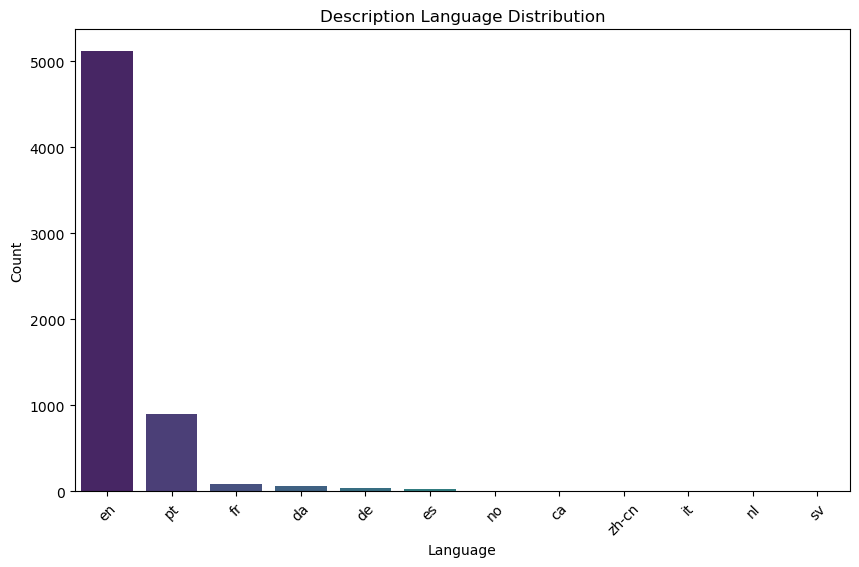

In [588]:
language_counts = train["description_language"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Description Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

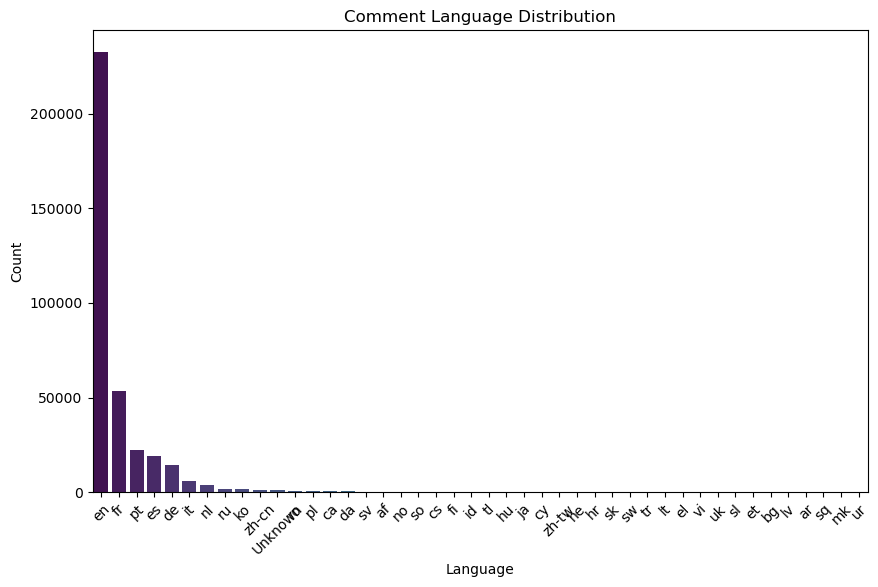

In [589]:
language_counts = train_reviews["comment_language"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Comment Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

'en': English 
'pt': Portuguese
'fr': French
'es': Spanish
'de': German
'da': Danish
'no': Norwegian
'sv': Swedish
'it': Italian
'ca': Catalan
'zh-cn': Chinese (Simplified)
'nl': Dutch

In [590]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

test["description_language"] = test["description"].apply(detect_language)
test.head()
test_reviews["comment_language"] = test_reviews["comments"].apply(detect_language)

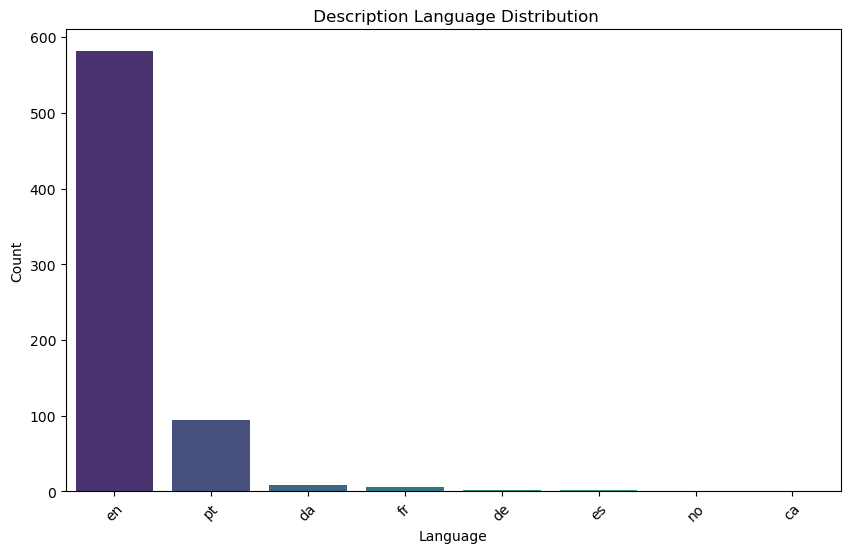

In [591]:
language_counts_test = test["description_language"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts_test.index, y=language_counts_test.values, palette="viridis")
plt.title(" Description Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [592]:
test["description_language"].value_counts()

en    581
pt     94
da      8
fr      6
de      2
es      2
no      1
ca      1
Name: description_language, dtype: int64

In [593]:
test_reviews["comment_language"].value_counts()

en         27589
fr          5933
pt          2190
es          2163
de          1745
it           627
nl           428
ko           190
ru           151
Unknown      125
zh-cn        116
ro            69
ca            60
pl            58
sv            45
da            45
af            34
fi            31
no            29
cs            26
so            26
hu            22
cy            20
id            20
ja            19
tl            17
zh-tw         17
he            13
el             9
hr             9
lt             8
tr             8
sk             5
vi             4
bg             3
sw             3
ar             2
et             2
uk             2
mk             1
kn             1
lv             1
Name: comment_language, dtype: int64

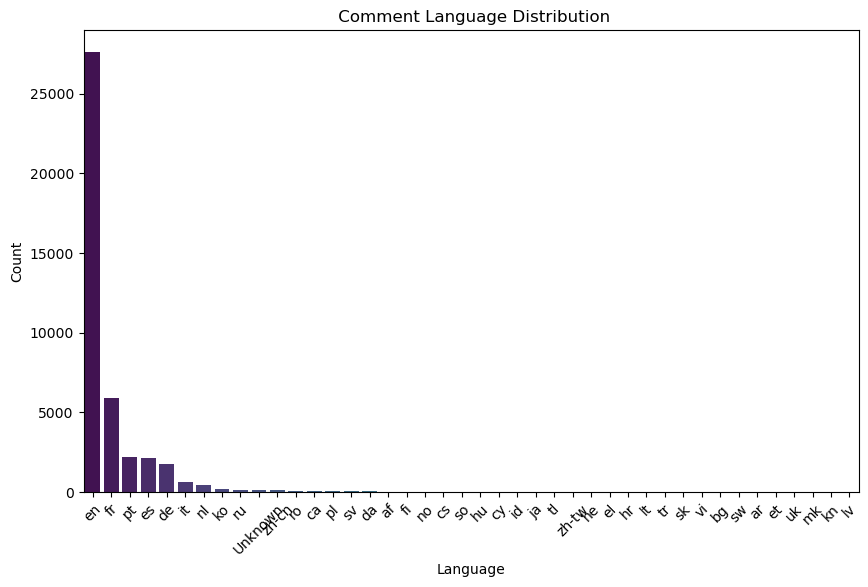

In [594]:
language_counts_test_2 = test_reviews["comment_language"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts_test_2.index, y=language_counts_test_2.values, palette="viridis")
plt.title(" Comment Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [595]:
train_reviews


,houseID,comments,comment_language
0,1,this is a very cozy and comfortable house to s...,en
1,1,good<br/>,cy
2,1,"My first hostel experience, and all I have to ...",en
3,1,Das Hostel war neu und deshalb funktionierte a...,de
4,1,"It was fine for a dorm, but I think for the pe...",en
...,...,...,...
361276,6248,The location was perfect. The apartment was ve...,en
361277,6248,Ana's place is exactly as described and even b...,en
361278,6248,A Ana foi muito atenciosa e preocupou se com o...,pt
361279,6248,No wifi nor answer. <br/>The wifi can’t be con...,en


In [596]:
train

,houseID,description,host_about,unlisted,description_language
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,pt
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,en
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,pt
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,fr
...,...,...,...,...,...
6243,6244,"Studio 15 is a new, very well decorated and co...",I'm a Brand Manager from Lisbon in Portugal bu...,0,en
6244,6245,Lisbon meets a cosmopolitan industrial one-bed...,Home is where feelings are visitors. How do we...,0,en
6245,6246,<b>License number</b><br />Exempt,I am a travel agent passionate by cultures. \n...,1,en
6246,6247,Campo Pequeno Prestige is a classy and top qua...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0,en


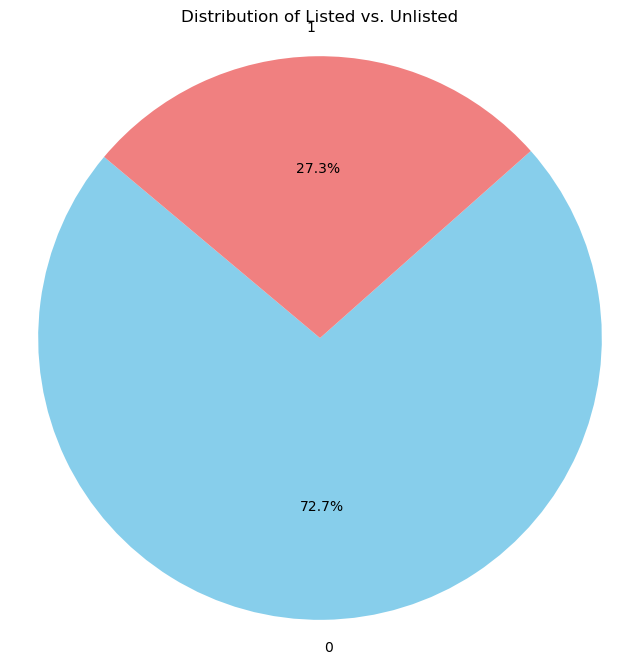

In [597]:
unlisted_counts = train['unlisted'].value_counts()

# Plotting the pie chart for the 'unlisted' column
plt.figure(figsize=(8, 8))
plt.pie(unlisted_counts, labels=unlisted_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Listed vs. Unlisted')
plt.axis('equal')  
plt.show()

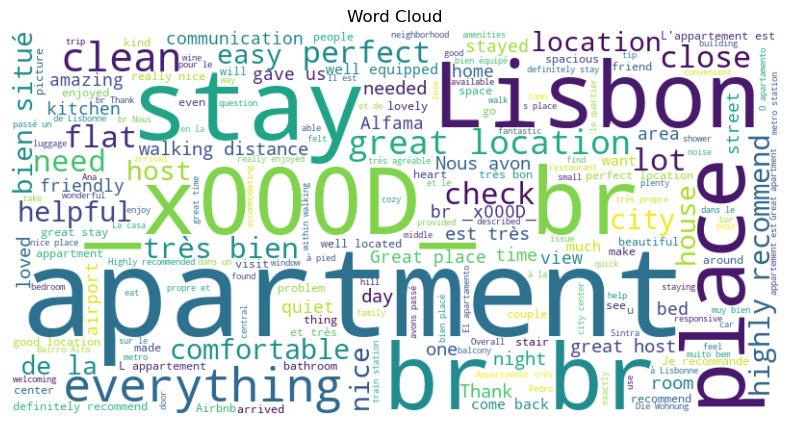

In [598]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Joining all the reviews into a single string, replacing NaNs with empty strings
all_reviews = ' '.join(str(comment) for comment in train_reviews['comments'] if pd.notna(comment))

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud')
plt.show()


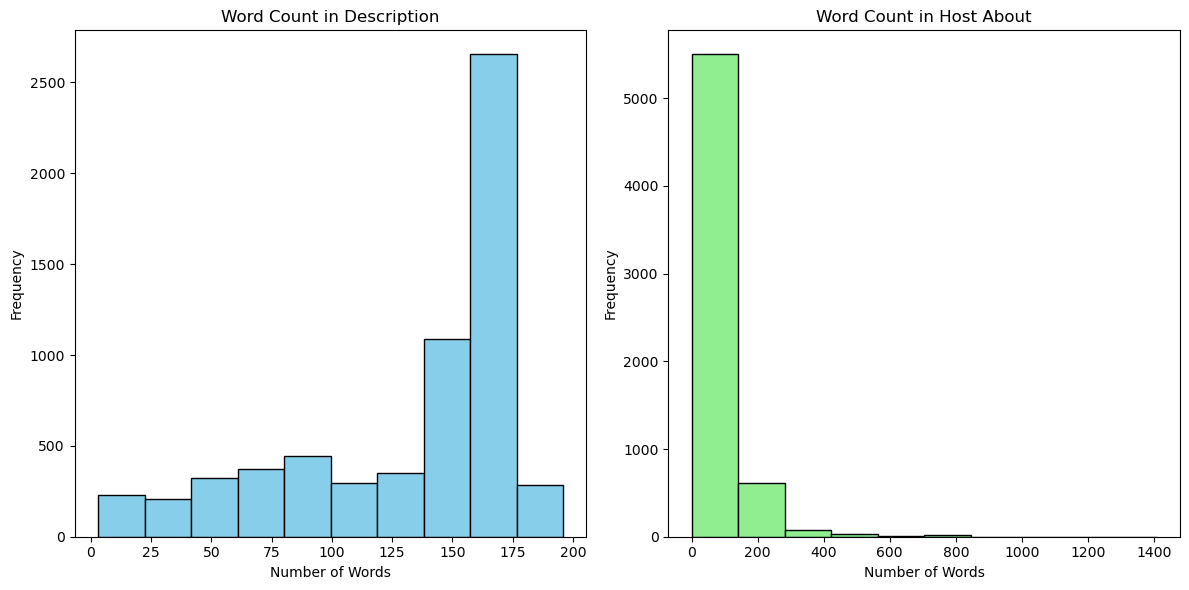

In [599]:
def count_words(text):
    return len(text.split())

# Apply word count function to each column
train['description_word_count'] = train['description'].apply(count_words)
train['host_about_word_count'] = train['host_about'].apply(count_words)

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for description word count
plt.subplot(1, 2, 1)
plt.hist(train['description_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Description')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for host_about word count
plt.subplot(1, 2, 2)
plt.hist(train['host_about_word_count'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Word Count in Host About')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

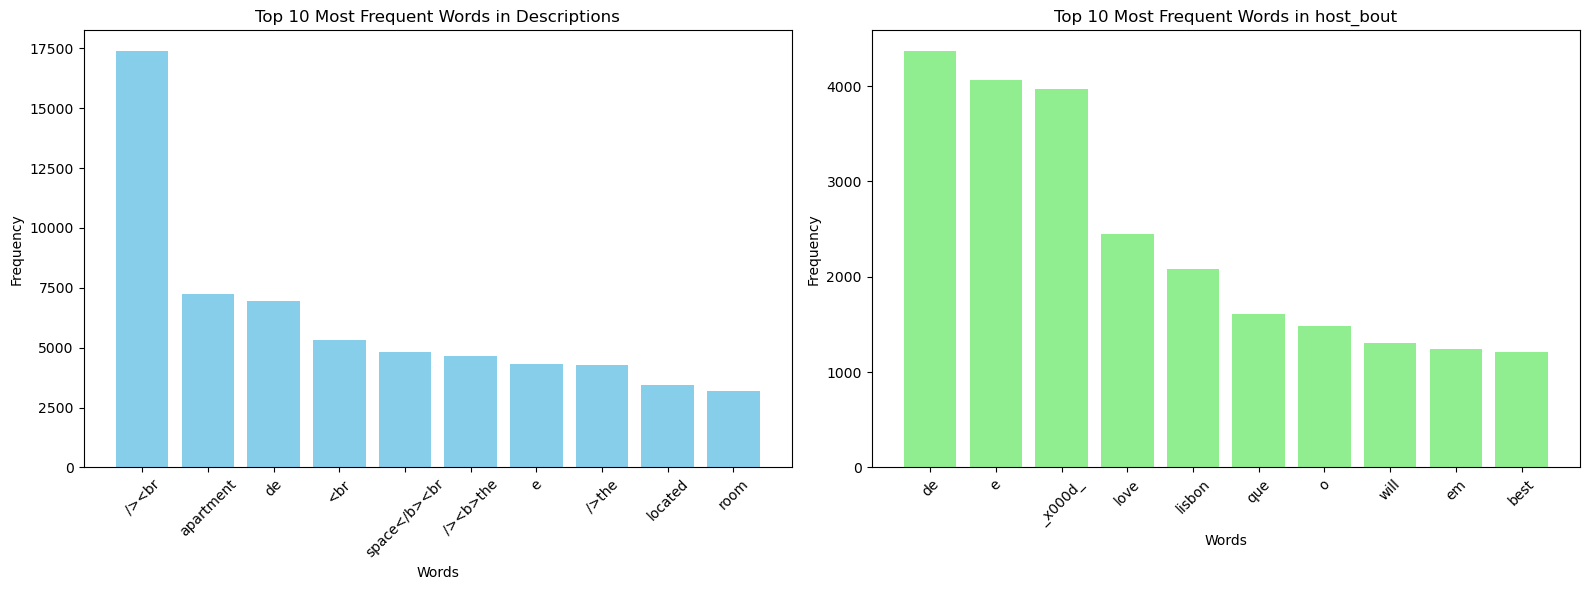

In [600]:
from collections import Counter
from wordcloud import STOPWORDS

def count_word_frequencies(text_column, num_words=10):
    # Join all text from the specified column into a single string
    all_text = ' '.join(text_column)

    # Convert text to lowercase and split into words
    words = all_text.lower().split()

    # Filter out common stop words
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)

# Count word frequencies from the 'description' and 'host_about' columns
top_words_description = count_word_frequencies(train['description'])
top_words_host_about = count_word_frequencies(train['host_about'])

# Plotting the histograms of most frequent words for both columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 'description' column
axes[0].bar(top_words_description.keys(), top_words_description.values(), color='skyblue')
axes[0].set_title('Top 10 Most Frequent Words in Descriptions')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot for 'host_about' column
axes[1].bar(top_words_host_about.keys(), top_words_host_about.values(), color='lightgreen')
axes[1].set_title('Top 10 Most Frequent Words in host_bout')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display plots
plt.tight_layout()
plt.show()

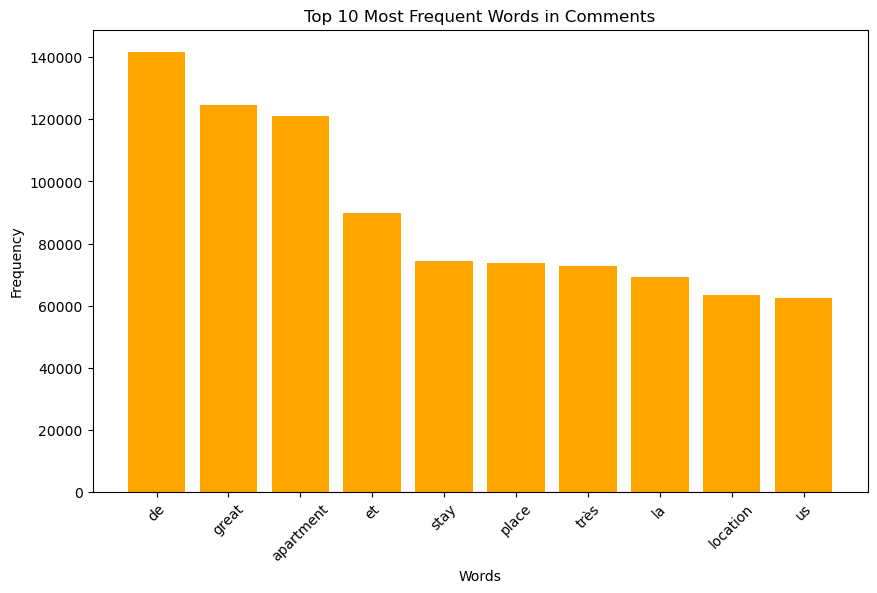

In [601]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

def count_word_frequencies(text_column, num_words=10):
    # Convert each comment to a string and concatenate them into a single text
    words = ' '.join(str(comment) for comment in text_column if pd.notna(comment)).lower().split()

    # Filter out common stop words
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)

# Count word frequencies from the 'comments' column
top_words_comments = count_word_frequencies(train_reviews['comments'])

# Plotting the histogram of most frequent words in 'comments' column
plt.figure(figsize=(10, 6))
plt.bar(top_words_comments.keys(), top_words_comments.values(), color='orange')
plt.title('Top 10 Most Frequent Words in Comments')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


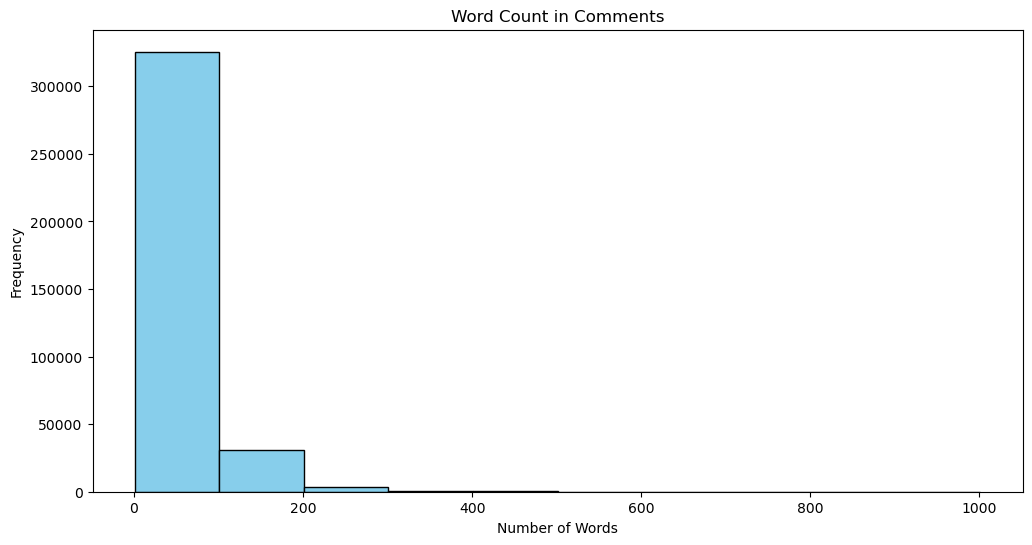

In [602]:
def count_words(text):
    # Convert text to string if it is not and handle NaN values
    if pd.isna(text):
        return 0
    return len(str(text).split())

# Apply word count function to the 'comments' column
train_reviews['comments_word_count'] = train_reviews['comments'].apply(count_words)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(train_reviews['comments_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Comments')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [603]:
def find_unique_matches(data, column):
    # Convert column data to string type (handle NaN values gracefully)
    column_data = data[column].astype(str)
    
    # Concatenate all comments into a single string
    all_comments = ' '.join(column_data)
    
    # Define a regular expression pattern to match small words and punctuation marks
    pattern = r'\b\w{1,2}\b|[^\w\s]'
    
    # Find all matches of the pattern in the concatenated string
    matches = re.findall(pattern, all_comments)
    
    # Return unique matches using a set comprehension
    return set(matches)


unique_matches = find_unique_matches(train_reviews, 'comments')

# Print the unique small words and punctuation marks
print("Unique small words and punctuation marks:")
print(list(unique_matches))


Unique small words and punctuation marks:
['61', '아닝', '노란', 'né', 'LO', '⁃', '🇺', '완전', '무척', '덮고', 'ví', 'wf', 'FR', '🧿', 'hã', 'På', 'แต', '못한', 'jr', '맞춰', '📱', '맏길', '앞의', '공원', '🐐', '인상', '좋게', '2è', 'Îl', 'ม', '드릴', '크지', 'Bs', '2e', 'À', '추정', '🔥', '미로', '냐욤', 'dó', '54', '외엔', '😔', '🧐', '뿐만', '안애', '钱包', '곳들', '시', 'są', '두면', '나고', '好评', '복층', 'dk', 'HQ', '넓고', 'אז', '비행', '테니', 'С', 'Ar', 'PR', 'di', 'eg', '틈이', 'C', '있구', '이나', '귀에', '다락', '딱', 'Cd', '방만', '饼干', 'pi', '餐馆', '🤎', 'be', '눈', '되지', 'NE', '방', '역대', 'ΟΙ', '3분', '주진', '🤍', '남은', '최종', '주는', '문의', '나올', 'Pd', '잘된', '糖', 'RJ', 'nn', '大爱', '벽이', '작은', 'lé', 'm', '자꾸', '먼것', 'MY', '|', '잠을', 'cé', 'Tl', 'Me', 'or', 'fr', 'Dr', '♡', '葡', '창이', '저것', 'TI', '수퍼', 'sû', 'με', 'ac', 'il', '올릴', '단호', '､', '보러', '쵸큼', '살짝', '건식', '29', 'ha', '쓰던', '숫자', '2х', '🏖', '84', 'rs', ')', 'ks', '번째', '착한', '근데', '3y', '언능', '있음', 'Wo', 'H3', '옷에', '쪽문', '有红', '조븐', '73', 'CA', 'rt', '여행', '¨', '🍒', '가', '버스', '🫧', '가면', 'ás', 'Fá

lots of emojis and small words


In [604]:
merged_data = pd.merge(train, train_reviews,  on='houseID', how='left')



In [605]:
test_merged_data = pd.merge(test, test_reviews,  on='houseID', how='left')


In [606]:
merged_data.drop(["description_word_count", "host_about_word_count", "comments_word_count"], axis=1, inplace=True)


In [607]:
merged_data

,houseID,description,host_about,unlisted,description_language,comments,comment_language
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,this is a very cozy and comfortable house to s...,en
1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,good<br/>,cy
2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,"My first hostel experience, and all I have to ...",en
3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,Das Hostel war neu und deshalb funktionierte a...,de
4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,"It was fine for a dorm, but I think for the pe...",en
...,...,...,...,...,...,...,...
363279,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,The location was perfect. The apartment was ve...,en
363280,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,Ana's place is exactly as described and even b...,en
363281,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,A Ana foi muito atenciosa e preocupou se com o...,pt
363282,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,No wifi nor answer. <br/>The wifi can’t be con...,en


In [608]:
test_merged_data

,houseID,description,host_about,description_language,comments,comment_language
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Thank you very much Antonio ! All has been per...,en
1,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Very nice appartment in the old town of Lissab...,en
2,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,When travelling we're looking for kids friendl...,en
3,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,We've been in Lisbon in march 2013 (3 adults a...,en
4,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Our host Antonio was very helpful with informa...,en
...,...,...,...,...,...,...
42081,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Everything was fine!,en
42082,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Very good located,en
42083,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Appartement confortable conforme aux photos bi...,fr
42084,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Très bon logement pour un week-end prolongé à ...,fr


In [609]:
merged_data.isna().sum()

houseID                    0
description                0
host_about                 0
unlisted                   0
description_language       0
comments                2003
comment_language        2003
dtype: int64

In [610]:
test_merged_data.isna().sum()

houseID                   0
description               0
host_about                0
description_language      0
comments                220
comment_language        220
dtype: int64

 For predicting whether an Airbnb listing is unlisted (0) or not (1), missing comments might indeed carry valuable information. The absence of comments could be an important feature in itself, potentially indicating something about the listing's status. Removing could lose some valuable info for predicting. 
 Different approaches : 
 

- Create a binary feature indicating whether a comment is missing (NaN) or not. This helps the model understand that the absence of a comment itself might be significant.
Fill Missing Comments with a Placeholder:

- Replace NaN values in the comments column with a placeholder text (e.g., "no_comment"). This ensures that all entries are treated as valid strings.

- both

In [611]:
merged_data['comments'].fillna('no_review', inplace=True)
test_merged_data['comments'].fillna('no_review', inplace=True)


In [612]:
merged_data.isna().sum()

houseID                    0
description                0
host_about                 0
unlisted                   0
description_language       0
comments                   0
comment_language        2003
dtype: int64

In [613]:
test_merged_data.isna().sum()

houseID                   0
description               0
host_about                0
description_language      0
comments                  0
comment_language        220
dtype: int64

In [614]:
merged_data['comment_language'].fillna('None', inplace=True)
test_merged_data['comment_language'].fillna('None', inplace=True)


### emojis treatment


The demojize() function takes a string as input and returns the string with the Unicode characters replaced by their corresponding emoji names. For example, if you pass the string “😀” to the demojize() function, it will return the string “smiley face”.
https://codeforgeek.com/python-emoji-module/ emoji for python
By default, the language is English (language='en') but also supported languages are:

Spanish ('es')

Portuguese ('pt')

Italian ('it')

French ('fr')

German ('de')

Farsi/Persian ('fa')

Indonesian ('id')

Simplified Chinese ('zh')

Japanese ('ja')

Korean ('ko')

Russian ('ru')

Arabic ('ar')

Turkish ('tr')

In [615]:
import emoji
import pandas as pd

# Function to check for emojis
def has_emojis(text):
    if pd.isnull(text):
        return False
    return emoji.emoji_count(str(text)) > 0

# Function to convert emojis to text
def convert_emojis_to_text(dataframe, column_text, column_language):
    dataframe_copy = dataframe.copy()

    def convert_text(text, language):
        if has_emojis(text):
            try:
                return emoji.demojize(text, language=language)
            except:
                return emoji.demojize(text, language='en')
        else:
            return text

    # Apply the conversion to each row
    dataframe_copy[column_text] = dataframe_copy.apply(
        lambda row: convert_text(row[column_text], row[column_language]), axis=1
    )
    
    return dataframe_copy






In [616]:
merged_data_demojized = convert_emojis_to_text(merged_data, 'comments', 'comment_language')



In [617]:
merged_data_demojized= convert_emojis_to_text(merged_data_demojized, 'description', 'description_language')

In [618]:
test_merged_data_demojized = convert_emojis_to_text(test_merged_data, 'comments', 'comment_language')
test_merged_data_demojized = convert_emojis_to_text(test_merged_data_demojized, 'description', 'description_language')



checking if there's still emojis

In [619]:
def print_comments_with_emojis(dataframe, column_text):
    with_emojis = dataframe[dataframe[column_text].apply(has_emojis)]
    print("Comments with emojis after processing:")
    for index, row in with_emojis.iterrows():
        print(f"Index {index}: {row[column_text]}")

print_comments_with_emojis(merged_data_demojized, 'comments')

Comments with emojis after processing:
Index 437: 👍
Index 831: 👍
Index 1044: Wspaniałe miejsce! <br/><br/>Gospodarz, który nas obsługiwał był niezwykle uprzejmy i pomocny. Gdy potrzebowaliśmy pomocy w nocy od razu się z nami skontaktował i pomógł nam natychmiast. Mieszkanie jest nowe, czyste, schludne, a okolica urokliwa i autentyczna. Do Lizbony centralnej jest dosłownie 30 minut spacerem. Jeśli planujesz urlop w Lizbonie, koniecznie rozważ tę ofertę, bo odpoczniesz i poczujesz się zaopiekowany. <br/><br/>Dziękujemy jeszcze raz za gościnę! 🥰
Index 2384: Good👌
Index 3135: Amazing 10/10😇
Index 5309: ♥️
Index 6095: 💚
Index 6178: 👍
Index 7108: Bardzo komfortowe mieszkanie . Ładne pokoje , komfortowe łazienki . Zlokalizowane  w cichej okolicy , blisko sklepiki lokalne .<br/>Bezproblemowe zameldowanie.  Do  centrum  kilka kroków, kilka schodków i jesteś na placu Rossio i na placu Martim Monitz  z którego rusza  słynny tramwaj 28!! Niedaleko Elevador da Lavra który  pomoże  zmęczonym dostać 

In [620]:
print_comments_with_emojis(merged_data_demojized, 'description')

Comments with emojis after processing:
Index 176748: 这是位于葡萄牙里斯本辛特拉的独栋私人别墅，位于著名度假胜地辛特拉高尔夫酒店的正对面，拥有里斯本最大的球场，5分钟即可到达沙滩🏖️<br /><br /><b>License number</b><br />Exempt


In [621]:
print_comments_with_emojis(test_merged_data_demojized, 'comments')

Comments with emojis after processing:
Index 109: Communicatie was super ! We kregen altijd onmiddellijk antwoord op onze vragen en Maria stuurde ons een lange lijst met veel informatie en leuke dingen om te doen in de stad ! Toen we vertrokken heeft ze ook de taxi geregeld die ons voor de deur heeft opgepikt 👌🏻 het appartement is ideaal gelegen , rustige buurt maar vlak bij veel leuke restaurantjes en cafés. Het appartement heeft veel charme maar voelt een beetje verouderd aan. De keuken is oud en ruikt wat muf. Badkamer en slaapkamers waren wel proper ! De koer was ideaal maar ook een beetje verwilderd. Al bij al hebben we enorm genoten van ons verblijf !
Index 1445: Dit appartement is een topper! Diego heeft ons heel goed ontvangen. Het appartement heeft een hele goeie locatie. Midden in een winkelstraat en maar een minuutje stappen van de metro 😉.
Index 1570: Amazing 🌊
Index 3007: 😁
Index 4838: Very nice place !!❤️
Index 7134: Een echte aanrader! Super goede communicatie met de hos

We still have a very small percentage of emojis remaining after running the conversion function, it might be due to several factors such as unsupported emojis, non-standard emoji representations, or limitations in the emoji library. In our to prevent data leakage our decisions will be based on training data, and the test data is processed using the same rules established from the training data.



Based on the training set, we created a dictionary mapping emojis to their textual representations. Any emoji not found in the custom dictionary will be replaced with a generic placeholder :emoji:

textual representations can be found here: https://www.w3schools.com/charsets/ref_emoji_smileys.asp

https://www.geeksforgeeks.org/convert-emoji-into-text-in-python/

In [622]:
remaining_emoji_dict = {
    '💥': ':collision:',
    '🤭': ':face_with_hand_over_mouth:',
    '☺️': ':white_smiling_face:',
    '🤩': ':star-struck:',
    '💪🏽': ':flexed_biceps_dark_skin_tone:',
    '👍': ':thumbs_up:',
    '⭐': ':star:',
    '😊': ':smiling_face_with_smiling_eyes:',
    '👌': ':ok_hand:',
    '👌🏼': ':ok_hand::light_skin_tone:',
    '👍🏻': ':thumbs_up_light_skin_tone:',
    '👍🏽': ':thumbs_up_medium-dark_skin_tone:',
    '😘': ':face_blowing_a_kiss:',
    '🤗': ':hugging_face:',
    '😉': ':winking_face:',
    '🌟': ':glowing_star:',
    '🙂': ':slightly_smiling_face:',
    '😱': ':face_screaming_in_fear:',
    '😃': ':grinning_face_with_big_eyes:',
    '❤️': ':heart:',
    '🥰': ':smiling_face_with_hearts:',
    '😇':'smiling_face_with_halo:',
    '🤙🏼': ":call_me_hand_medium-light_skin_tone:",
    '🤙': ":call_me_hand:",
    '👏': ':clapping_hands:',
    '👏🏼': ':clapping_hands::light_skin_tone:',
    '💚': ':green_heart:',
    '🙂': ':slightly_smiling_face:',
    '🔝': ':top_arrow:',
    '👌🏽': ':ok_hand::medium_skin_tone:',
    '😁': ':beaming_face_with_smiling_eyes:',
    '😂': ':face_with_tears_of_joy:',
    '🇵🇹': ':flag_Portugal:',
    '😍': ':smiling_face_with_heart-eyes:',
    '✨': ':sparkles:',
    '🙏🏻': ':folded_hands::light_skin_tone:',
    '⭐': ':star:',
    '😏': ':smirking_face:',
    '😋': ':face_savoring_food:',
    '🐝': ':honeybee:',
    '😎': ':smiling_face_with_sunglasses:',
    '💯': ':hundred_points:',
    '🎇': ':sparkler:',
    '🖤': ':black_heart:',
    '😌': ':relieved_face:',
    '🐈': ':cat:',
    '🎈': ':balons:',
    '💕': ':two_hearts:',
    '🚀': ':rocket:',
    '🌞': ':sun_with_face:',
    '🍋': ':lemon:',
    '😜':':stuck_out_tongue_winking_eye:',
    '🪨': ':rock:',
    '✌️': ':victory_hand:',
    '🔑': ':key:',
    '😃': ':grinning_face_with_big_eyes:',
    '😀':':grinning_face:',
    '✔️':':check_mark:',
    '🉐':':Japanese_acceptable_button:',
    '🤪':':zany_face:',
    '😆': ':grinning_squinting_face:',
    '🌅': ':sunrise:',
    '🌸': ':cherry_blossom:',
    '🦫': ':beaver:',
    '🎷': ':saxophone:',
    '🔥':':fire:',
    '🐐':':goat:',
    '🤝':':handshake:',
    '☹️':':frowning_face:',
    '☀️':':sun:',
    '🌱': ':seedling:',
    '✅': ':white_heavy_check_mark:',
    '🌹': ':rose:',
    '🙈': ':see-no-evil_monkey:',
    '💗': ':growing_heart:',
    '🏖️': ':beach:',
    '👌🏾': ':ok_hand::medium-dark_skin_tone:',
    '♥️': ':heart_suit:',
    '❤️': ':red_heart:',
    '🙌🏻':':raising_hands::light_skin_tone:',
    '🙌🏾':':raising_hands::medium-dark_skin_tone:',
    '☔':':umbrella_with_rain_drops:',
    '🇧🇪':':flag_Belgium:',
    '👎🏽':':thumbs_down::medium_skin_tone:',
    '👍🏼':':thumbs_up::medium-light_skin_tone:',
    '🤨':':face_with_raised_eyebrow:',
    '😭':':loudly_crying_face:',
    '👍🏾':':thumbs_up::medium-dark_skin_tone:',
    '🤟🏻':':love-you_gesture::light_skin_tone:',
    '🙁':':slightly_frowning_face:',
    '🤣':':rolling_on_the_floor_laughing:',
    '👌🏿':':ok_hand::dark_skin_tone:',
    '🇩🇰':':flag_Denmark:',
    '❣️':':heavy_heart_exclamation_mark_ornament:',
    
    
    
    
}



In [623]:
import emoji


import emoji

# Define a function to check if a text contains any emojis
def has_emojis(text):
    return any(emoji.is_emoji(char) for char in text)

# Define a function to replace the remaining emojis using a custom dictionary
def custom_replace_remaining_emojis(text, emoji_dict):
    for emj, desc in emoji_dict.items():
        text = text.replace(emj, desc)
    return text

# Define a function to replace any unknown emojis with a placeholder
def replace_unknown_emojis(text):
    return emoji.replace_emoji(text, replace=":emoji:")

# Define a function to process remaining emojis in the dataframe
def process_remaining_emojis(dataframe, column_text, emoji_dict):
    dataframe_copy = dataframe.copy()

    def convert_text_with_remaining_dict(text):
        if has_emojis(text):
            text = custom_replace_remaining_emojis(text, emoji_dict)
            text = replace_unknown_emojis(text)
            return text
        else:
            return text

    dataframe_copy[column_text] = dataframe_copy[column_text].apply(convert_text_with_remaining_dict)
    return dataframe_copy






In [624]:
merged_data_demojized = process_remaining_emojis(merged_data_demojized, 'comments', remaining_emoji_dict)
merged_data_demojized = process_remaining_emojis(merged_data_demojized, 'description', remaining_emoji_dict)
test_merged_data_demojized = process_remaining_emojis(test_merged_data_demojized, 'description', remaining_emoji_dict)
test_merged_data_demojized = process_remaining_emojis(test_merged_data_demojized, 'comments', remaining_emoji_dict)






In [625]:
def print_comments_with_emojis(dataframe, column_text):
    with_emojis = dataframe[dataframe[column_text].apply(has_emojis)]
    print("Comments with emojis after processing:")
    for index, row in with_emojis.iterrows():
        print(f"Index {index}: {row[column_text]}")

print_comments_with_emojis(merged_data_demojized, 'comments')
print_comments_with_emojis(test_merged_data_demojized, 'comments')
print_comments_with_emojis(merged_data_demojized, 'description')
print_comments_with_emojis(test_merged_data_demojized, 'description')

Comments with emojis after processing:
Comments with emojis after processing:
Comments with emojis after processing:
Comments with emojis after processing:


# Train- test- Split

In [626]:
merged_data_demojized

,houseID,description,host_about,unlisted,description_language,comments,comment_language
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,this is a very cozy and comfortable house to s...,en
1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,good<br/>,cy
2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,"My first hostel experience, and all I have to ...",en
3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,Das Hostel war neu und deshalb funktionierte a...,de
4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,"It was fine for a dorm, but I think for the pe...",en
...,...,...,...,...,...,...,...
363279,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,The location was perfect. The apartment was ve...,en
363280,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,Ana's place is exactly as described and even b...,en
363281,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,A Ana foi muito atenciosa e preocupou se com o...,pt
363282,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,No wifi nor answer. <br/>The wifi can’t be con...,en


In [627]:
test_merged_data_demojized

,houseID,description,host_about,description_language,comments,comment_language
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Thank you very much Antonio ! All has been per...,en
1,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Very nice appartment in the old town of Lissab...,en
2,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,When travelling we're looking for kids friendl...,en
3,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,We've been in Lisbon in march 2013 (3 adults a...,en
4,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Our host Antonio was very helpful with informa...,en
...,...,...,...,...,...,...
42081,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Everything was fine!,en
42082,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Very good located,en
42083,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Appartement confortable conforme aux photos bi...,fr
42084,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Très bon logement pour un week-end prolongé à ...,fr


In [866]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(merged_data_demojized[['description', 'host_about', 'description_language', 'comments', 'comment_language', 'houseID']], merged_data_demojized[['unlisted', 'houseID']], test_size=0.2, random_state=42, stratify=merged_data_demojized['unlisted'])





In [867]:
# Create copies of the split data
X_train_copy = X_train.copy()
X_val_copy = X_val.copy()
y_train_copy = y_train.copy()
y_val_copy = y_val.copy()


In [868]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290627 entries, 315288 to 337869
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   description           290627 non-null  object
 1   host_about            290627 non-null  object
 2   description_language  290627 non-null  object
 3   comments              290627 non-null  object
 4   comment_language      290627 non-null  object
 5   houseID               290627 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 15.5+ MB


In [869]:
X_train

,description,host_about,description_language,comments,comment_language,houseID
315288,This perfect and bright House is located in th...,Carla Martins (NOOK AGENCY) \n,en,Great private space in an ideal location.,en,5469
65688,This sunny and cozy apartment is located in th...,"Hi! I’m Grinuy, I lived 20 years in Lagos, Alg...",en,"Foi uma ótima ótima estadia, lugar excelente e...",pt,1101
248814,"Lisbon, Alfama, Praça do Comércio - Very centr...",WELCOME TO A NEW HOSTING CONCEPT!_x000D_\n_x00...,en,Location makes it a great hub to see the city....,en,4254
224379,"Huge 9-bedroom, 10-bathroom property with priv...","We manage our apartment in Lisbon personally, ...",en,Ricarlo and Elena was very helpful throughout ...,en,3804
274176,"Our home is next to a Subway Station, just 1 m...","We came from different cultures, but we share ...",en,Atendimento 5 estrelas . Apto muito bom e com ...,pt,4667
...,...,...,...,...,...,...
51993,This charming big apartment is totally refurbi...,"In my later years, I have looked in the mirror...",en,Nice room with a big living area. Really clean...,en,898
166530,Allow yourself to stay in his living like a lo...,We are a portuguese couple that at the beginni...,en,Susana was a great host and made Check in and ...,en,2784
127405,"<b>The space</b><br />In the apartment, you wo...",One thing I can't live without: music._x000D_\...,en,C'était parfait .<br/>Emplacement idéal et cal...,fr,2157
167225,Watch the shades of the traditional patterned ...,"Hello! LISBON SMART STAY APARTMENTS, welcomes ...",en,Location! Location! Location! Located very clo...,en,2797


In [870]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72657 entries, 88159 to 218819
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   description           72657 non-null  object
 1   host_about            72657 non-null  object
 2   description_language  72657 non-null  object
 3   comments              72657 non-null  object
 4   comment_language      72657 non-null  object
 5   houseID               72657 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 3.9+ MB


In [871]:
X_val

,description,host_about,description_language,comments,comment_language,houseID
88159,"Baixa, or downtown Lisbon is one of the most s...",We are Sara and Gonçalo._x000D_\nWe hope that ...,en,에어비앤비에 게시되어 있는 주소가 아닌 호스트가 메세지로 보내주는 상세주소를 보는게...,ko,1472
55299,Apartment Living Alfama is:<br />-in a pedestr...,"Hello everybody !! :)\nMy name is Quentin, I l...",en,Appartement bien agencé lumineux et TRÈS bien ...,fr,946
175486,New and excellent apartment in Central Chiado....,"We love to receive and meet new people, and wa...",en,The location could not be better! I would 11/1...,en,2957
152690,"PARTMENT FIVE MINUTES FROM THE AIRPORT , 6/7 E...","Sou muito simples ,discreta e bastante humana .",en,"Tres beau condo, près de tout. Je recommande ...",fr,2577
268508,"Hi,<br />First of all thanks for looking my ap...",I´m from Lisbon and love my country.,en,"António is a fabulous host , even meeting us a...",en,4566
...,...,...,...,...,...,...
152948,This central apartment located in one tof the ...,"Hi, my name is Bruno and I'm renting a duplex ...",en,It has been a pleasure to be Bruno's guests. T...,en,2584
344117,Beautiful 2 ensuite apartment in the heart of ...,"Loving travelling myself, I know how great it ...",en,My partner and I stayed at Tiago’s place for t...,en,5900
270059,<b>The space</b><br />Chiado 1 is located at T...,"Hi, this is Mário from Fadoflats. We are renti...",en,The flat is even better than the description a...,en,4582
184859,Welcome to Reis Leon III! This luxurious three...,"Born in Spain, but grow up and studied in Port...",en,This may probably be the best apartment we sta...,en,3111


In [872]:
y_train.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290627 entries, 315288 to 337869
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   unlisted  290627 non-null  int64
 1   houseID   290627 non-null  int64
dtypes: int64(2)
memory usage: 6.7 MB


In [873]:
y_train

,unlisted,houseID
315288,0,5469
65688,0,1101
248814,0,4254
224379,0,3804
274176,0,4667
...,...,...
51993,1,898
166530,0,2784
127405,0,2157
167225,0,2797


In [874]:
y_val

,unlisted,houseID
88159,0,1472
55299,0,946
175486,0,2957
152690,0,2577
268508,0,4566
...,...,...
152948,0,2584
344117,0,5900
270059,0,4582
184859,0,3111


# Pre-Processing

### Duplicates

In [875]:
### Duplicates


duplicates_train = X_train[X_train.duplicated(subset=['houseID', 'comments'], keep=False)]
print(duplicates_train)

duplicates_val = X_val[X_val.duplicated(subset=['houseID', 'comments'], keep=False)]
print(duplicates_val)

duplicates_val.head()

                                              description  \
118787  Lisbon is eclecticism, a light, inhabitants. C...   
13855   We offer You  a comfortable renovated 3-bedroo...   
54641   Fantastic house in the heart of lisbon  center...   
54985   Totally renovated to modern standards, this ol...   
184978  Quarto,totalmente remodelada/nova, com muita l...   
...                                                   ...   
58608   Open the windows and let light and a fresh bre...   
173513  Bem vindo a Alfama!<br />No coração do bairro ...   
134578  Apartamento  novo de luxo,  decorado requintad...   
14061   We offer You  a comfortable renovated 3-bedroo...   
348137  <b>The space</b><br />We are in the best possi...   

                                               host_about  \
118787  I strongly believe in the benefits of travel: ...   
13855   Hi , we are Alfiya and Joao. We live in Lisbon...   
54641   Two brothers and lovers of houses , decoration...   
54985   I was born in N

,description,host_about,description_language,comments,comment_language,houseID
109050,Central Hill Apartments is a company with over...,"Hosting since 2012, Central Hill Apartments is...",en,"Nice Stay in this huge flat, thank you!",en,1839
109049,Central Hill Apartments is a company with over...,"Hosting since 2012, Central Hill Apartments is...",en,"Nice Stay in this huge flat, thank you!",en,1839
251282,Apartamento lujosamente equipado y mejor ubica...,"Soy simpatica, dispuesta a ayudar, pinto cuadr...",es,Great location,en,4299
334342,Dentro das muralhas do Castelo de São Jorge en...,Somos um casal apaixonado pela cidade de Lisbo...,pt,"Perfect location! Wonderful flat, very histori...",en,5767
247454,bengalo/moradia no meio da natureza e da praia...,"Sou o nuno 26 anos,natural de sintra com algum...",pt,Muito bom,pt,4236


In [876]:
X_train.drop_duplicates(subset=['houseID', 'comments'], inplace=True)
X_val.drop_duplicates(subset=['houseID', 'comments'], inplace=True)
test_merged_data_demojized.drop_duplicates(subset=['houseID', 'comments'], inplace=True)

y_train = y_train.loc[X_train.index]
y_val = y_val.loc[X_val.index]


In [877]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((290535, 6), (72648, 6), (290535, 2), (72648, 2))

In [878]:
duplicates_train = X_train[X_train.duplicated(subset=['houseID', 'comments'], keep=False)]
duplicates_val = X_val[X_val.duplicated(subset=['houseID', 'comments'], keep=False)]
duplicates_test = test_merged_data_demojized[test_merged_data_demojized.duplicated(subset=['houseID', 'comments'], keep=False)]

print("Duplicates in training data:")
print(duplicates_train)

print("Duplicates in validation data:")
print(duplicates_val)

print("Duplicates in test data:")
print(duplicates_test)

Duplicates in training data:
Empty DataFrame
Columns: [description, host_about, description_language, comments, comment_language, houseID]
Index: []
Duplicates in validation data:
Empty DataFrame
Columns: [description, host_about, description_language, comments, comment_language, houseID]
Index: []
Duplicates in test data:
Empty DataFrame
Columns: [houseID, description, description_language, comments, comment_language]
Index: []


### dropping small words

In [879]:
#we defined this function earlier, so we drop the small words 

unique_matches = find_unique_matches(X_train, 'comments')
unique_matches_val = find_unique_matches(X_val, 'comments')
unique_matches_test = find_unique_matches(test_merged_data_demojized, 'comments')

unique_matches


X_train = X_train[~X_train['comments'].isin(unique_matches)]
X_val = X_val[~X_val['comments'].isin(unique_matches_val)]
test_merged_data_demojized = test_merged_data_demojized[~test_merged_data_demojized['comments'].isin(unique_matches_test)]

In [880]:
y_train = y_train.loc[X_train.index]
y_val = y_val.loc[X_val.index]

In [881]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((289903, 6), (72497, 6), (289903, 2), (72497, 2))

remove "host_about" because it's just a description of the hos, probably not important for predicting


In [882]:
X_train.drop('host_about', axis=1, inplace=True)
X_val.drop('host_about', axis=1, inplace=True)
test_merged_data_demojized.drop('host_about', axis=1, inplace=True)

/var/folders/ck/pg5pk4ds5xjg9yg2w1v9n8880000gn/T/ipykernel_2089/2962349479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop('host_about', axis=1, inplace=True)
/var/folders/ck/pg5pk4ds5xjg9yg2w1v9n8880000gn/T/ipykernel_2089/2962349479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val.drop('host_about', axis=1, inplace=True)


KeyError: "['host_about'] not found in axis"

### Cleaning Language

In [883]:
language_counts_description = X_train['description_language'].value_counts()

total_entries = len(X_train)
language_percentages_description = (language_counts_description / total_entries) * 100

print("\nLanguage description Percentages:")
print(language_percentages_description)


Language description Percentages:
en       90.159812
pt        7.981980
fr        0.882364
da        0.460844
es        0.259397
de        0.234216
zh-cn     0.018627
ca        0.001035
it        0.000690
no        0.000690
nl        0.000345
Name: description_language, dtype: float64


In [884]:
language_counts_comments = X_train['comment_language'].value_counts()

total_entries = len(X_train)
language_percentages_comments = (language_counts_comments / total_entries) * 100

print("\nLanguage comment Percentages:")
print(language_percentages_comments)


Language comment Percentages:
en         64.127312
fr         14.693880
pt          6.164476
es          5.329369
de          3.953391
it          1.547414
nl          0.989296
None        0.550874
ru          0.407033
ko          0.402548
zh-cn       0.273195
ro          0.221453
pl          0.159709
ca          0.156949
da          0.123835
sv          0.100723
Unknown     0.091410
af          0.083476
no          0.082786
so          0.068989
fi          0.054846
cs          0.054156
id          0.042083
hu          0.035874
tl          0.035184
cy          0.030700
ja          0.028975
zh-tw       0.024836
he          0.024491
hr          0.022421
lt          0.016212
tr          0.016212
sw          0.016212
sk          0.014143
uk          0.011383
el          0.011038
sl          0.010003
vi          0.006554
et          0.005519
bg          0.004139
lv          0.003449
ar          0.002070
sq          0.001035
mk          0.000345
Name: comment_language, dtype: float64


### filtering languages

To do the preprocessing steps, using NLTK package, there are only some supported languages. We'll use the one's that are supported by filtering


In [885]:
supported_languages_nltk = [
    'ar', 'da', 'en', 'nl', 'fi', 'fr', 'de', 'hu', 'it', 
    'no', 'nl', 'pt', 'ro', 'ru', 'es', 'sv'
]

X_train_filtered = X_train[
    X_train['comment_language'].isin(supported_languages_nltk) &
    X_train['description_language'].isin(supported_languages_nltk)
]

In [886]:
X_train_filtered["comment_language"].value_counts()

en    185872
fr     42593
pt     17864
es     15446
de     11460
it      4486
nl      2868
ru      1179
ro       642
da       359
sv       292
no       240
fi       159
hu       104
ar         6
Name: comment_language, dtype: int64

In [887]:
X_train_filtered["description_language"].value_counts()

en    255996
pt     22403
fr      2509
da      1292
es       713
de       657
Name: description_language, dtype: int64

In [888]:
X_train= X_train_filtered.copy()

In [889]:
X_val_filtered = X_val[X_val['comment_language'].isin(supported_languages_nltk) & X_val['description_language'].isin(supported_languages_nltk)]
test_merged_data_filtered = test_merged_data_demojized[test_merged_data_demojized['comment_language'].isin(supported_languages_nltk) & test_merged_data_demojized['description_language'].isin(supported_languages_nltk)]

In [890]:
X_val= X_val_filtered.copy()
test_merged_data_demojized  = test_merged_data_filtered.copy()

In [891]:
y_train_filtered = y_train.loc[X_train.index]
y_train = y_train_filtered.copy()

y_val_filtered = y_val.loc[X_val.index]
y_val = y_val_filtered.copy()



In [892]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((283570, 5), (70802, 5), (283570, 2), (70802, 2))

# Cleaning data 

In [893]:
import re
from tqdm import tqdm
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from unidecode import unidecode
import nltk

In [894]:
X_train_clean = X_train.copy()  
X_val_clean = X_val.copy()
test_clean = test_merged_data_demojized.copy()

In [895]:
X_train_clean

,description,description_language,comments,comment_language,houseID
315288,This perfect and bright House is located in th...,en,Great private space in an ideal location.,en,5469
65688,This sunny and cozy apartment is located in th...,en,"Foi uma ótima ótima estadia, lugar excelente e...",pt,1101
248814,"Lisbon, Alfama, Praça do Comércio - Very centr...",en,Location makes it a great hub to see the city....,en,4254
224379,"Huge 9-bedroom, 10-bathroom property with priv...",en,Ricarlo and Elena was very helpful throughout ...,en,3804
274176,"Our home is next to a Subway Station, just 1 m...",en,Atendimento 5 estrelas . Apto muito bom e com ...,pt,4667
...,...,...,...,...,...
51993,This charming big apartment is totally refurbi...,en,Nice room with a big living area. Really clean...,en,898
166530,Allow yourself to stay in his living like a lo...,en,Susana was a great host and made Check in and ...,en,2784
127405,"<b>The space</b><br />In the apartment, you wo...",en,C'était parfait .<br/>Emplacement idéal et cal...,fr,2157
167225,Watch the shades of the traditional patterned ...,en,Location! Location! Location! Located very clo...,en,2797


### Removing accents

In [896]:
accent_mapping = {
    'à': 'a', 'á': 'a', 'â': 'a', 'ã': 'a', 'ä': 'a', 'å': 'a', 'æ': 'ae', 'ā': 'a',
    'è': 'e', 'é': 'e', 'ê': 'e', 'ë': 'e', 'ē': 'e',
    'ì': 'i', 'í': 'i', 'î': 'i', 'ï': 'i',
    'ò': 'o', 'ó': 'o', 'ô': 'o', 'õ': 'o', 'ö': 'o', 'ø': 'o', 'œ': 'oe',
    'ù': 'u', 'ú': 'u', 'û': 'u', 'ü': 'u', 'ū': 'u', 'ů': 'u',
    'ç': 'c',
    'ñ': 'n',
    'ś': 's', 'š': 's', 'ß': 'ss',
    'ź': 'z', 'ż': 'z', 'ž': 'z'
}

In [897]:
def remove_accents(text, mapping):
    return ''.join(mapping.get(char, char) for char in text)

In [898]:
X_train_clean['clean_comments'] = X_train_clean['comments'].apply(lambda x: remove_accents(x, accent_mapping))
X_train_clean['clean_description'] = X_train_clean['description'].apply(lambda x: remove_accents(x, accent_mapping))
X_val_clean['clean_comments'] = X_val_clean['comments'].apply(lambda x: remove_accents(x, accent_mapping))
X_val_clean['clean_description'] = X_val_clean['description'].apply(lambda x: remove_accents(x, accent_mapping))
test_clean['clean_comments'] = test_clean['comments'].apply(lambda x: remove_accents(x, accent_mapping))
test_clean['clean_description'] = test_clean['description'].apply(lambda x: remove_accents(x, accent_mapping))

In [899]:
X_train_clean

,description,description_language,comments,comment_language,houseID,clean_comments,clean_description
315288,This perfect and bright House is located in th...,en,Great private space in an ideal location.,en,5469,Great private space in an ideal location.,This perfect and bright House is located in th...
65688,This sunny and cozy apartment is located in th...,en,"Foi uma ótima ótima estadia, lugar excelente e...",pt,1101,"Foi uma otima otima estadia, lugar excelente e...",This sunny and cozy apartment is located in th...
248814,"Lisbon, Alfama, Praça do Comércio - Very centr...",en,Location makes it a great hub to see the city....,en,4254,Location makes it a great hub to see the city....,"Lisbon, Alfama, Praca do Comercio - Very centr..."
224379,"Huge 9-bedroom, 10-bathroom property with priv...",en,Ricarlo and Elena was very helpful throughout ...,en,3804,Ricarlo and Elena was very helpful throughout ...,"Huge 9-bedroom, 10-bathroom property with priv..."
274176,"Our home is next to a Subway Station, just 1 m...",en,Atendimento 5 estrelas . Apto muito bom e com ...,pt,4667,Atendimento 5 estrelas . Apto muito bom e com ...,"Our home is next to a Subway Station, just 1 m..."
...,...,...,...,...,...,...,...
51993,This charming big apartment is totally refurbi...,en,Nice room with a big living area. Really clean...,en,898,Nice room with a big living area. Really clean...,This charming big apartment is totally refurbi...
166530,Allow yourself to stay in his living like a lo...,en,Susana was a great host and made Check in and ...,en,2784,Susana was a great host and made Check in and ...,Allow yourself to stay in his living like a lo...
127405,"<b>The space</b><br />In the apartment, you wo...",en,C'était parfait .<br/>Emplacement idéal et cal...,fr,2157,C'etait parfait .<br/>Emplacement ideal et cal...,"<b>The space</b><br />In the apartment, you wo..."
167225,Watch the shades of the traditional patterned ...,en,Location! Location! Location! Located very clo...,en,2797,Location! Location! Location! Located very clo...,Watch the shades of the traditional patterned ...


### Lower Case

In [900]:
X_train_clean['clean_comments'] = X_train_clean['clean_comments'].str.lower()
X_train_clean['clean_description'] = X_train_clean['clean_description'].str.lower()

X_val_clean['clean_comments'] = X_val_clean['clean_comments'].str.lower()
X_val_clean['clean_description'] = X_val_clean['clean_description'].str.lower()

test_clean['clean_comments'] = test_clean['clean_comments'].str.lower()
test_clean['clean_description'] = test_clean['clean_description'].str.lower()

In [901]:
X_train_clean

,description,description_language,comments,comment_language,houseID,clean_comments,clean_description
315288,This perfect and bright House is located in th...,en,Great private space in an ideal location.,en,5469,great private space in an ideal location.,this perfect and bright house is located in th...
65688,This sunny and cozy apartment is located in th...,en,"Foi uma ótima ótima estadia, lugar excelente e...",pt,1101,"foi uma otima otima estadia, lugar excelente e...",this sunny and cozy apartment is located in th...
248814,"Lisbon, Alfama, Praça do Comércio - Very centr...",en,Location makes it a great hub to see the city....,en,4254,location makes it a great hub to see the city....,"lisbon, alfama, praca do comercio - very centr..."
224379,"Huge 9-bedroom, 10-bathroom property with priv...",en,Ricarlo and Elena was very helpful throughout ...,en,3804,ricarlo and elena was very helpful throughout ...,"huge 9-bedroom, 10-bathroom property with priv..."
274176,"Our home is next to a Subway Station, just 1 m...",en,Atendimento 5 estrelas . Apto muito bom e com ...,pt,4667,atendimento 5 estrelas . apto muito bom e com ...,"our home is next to a subway station, just 1 m..."
...,...,...,...,...,...,...,...
51993,This charming big apartment is totally refurbi...,en,Nice room with a big living area. Really clean...,en,898,nice room with a big living area. really clean...,this charming big apartment is totally refurbi...
166530,Allow yourself to stay in his living like a lo...,en,Susana was a great host and made Check in and ...,en,2784,susana was a great host and made check in and ...,allow yourself to stay in his living like a lo...
127405,"<b>The space</b><br />In the apartment, you wo...",en,C'était parfait .<br/>Emplacement idéal et cal...,fr,2157,c'etait parfait .<br/>emplacement ideal et cal...,"<b>the space</b><br />in the apartment, you wo..."
167225,Watch the shades of the traditional patterned ...,en,Location! Location! Location! Located very clo...,en,2797,location! location! location! located very clo...,watch the shades of the traditional patterned ...


### Remove HTML tags

In [902]:
def remove_html_tags(text):
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub("<br />", " ", text)
    return text

In [903]:
X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_html_tags)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_html_tags)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_html_tags)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_html_tags)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_html_tags)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_html_tags)

### URL

In [904]:
import re

def remove_urls(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', ' ', text)
    return text

X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_urls)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_urls)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_urls)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_urls)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_urls)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_urls)

### Numbers

In [905]:
def replace_numbers(text):
    number_pattern = r'\b\d+\b'
    return re.sub(number_pattern, 'number', text)

In [906]:
X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(replace_numbers)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(replace_numbers)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(replace_numbers)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(replace_numbers)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(replace_numbers)
test_clean['clean_description'] = test_clean['clean_description'].apply(replace_numbers)

In [907]:
X_train_clean

,description,description_language,comments,comment_language,houseID,clean_comments,clean_description
315288,This perfect and bright House is located in th...,en,Great private space in an ideal location.,en,5469,great private space in an ideal location.,this perfect and bright house is located in th...
65688,This sunny and cozy apartment is located in th...,en,"Foi uma ótima ótima estadia, lugar excelente e...",pt,1101,"foi uma otima otima estadia, lugar excelente e...",this sunny and cozy apartment is located in th...
248814,"Lisbon, Alfama, Praça do Comércio - Very centr...",en,Location makes it a great hub to see the city....,en,4254,location makes it a great hub to see the city....,"lisbon, alfama, praca do comercio - very centr..."
224379,"Huge 9-bedroom, 10-bathroom property with priv...",en,Ricarlo and Elena was very helpful throughout ...,en,3804,ricarlo and elena was very helpful throughout ...,"huge number-bedroom, number-bathroom property ..."
274176,"Our home is next to a Subway Station, just 1 m...",en,Atendimento 5 estrelas . Apto muito bom e com ...,pt,4667,atendimento number estrelas . apto muito bom e...,"our home is next to a subway station, just num..."
...,...,...,...,...,...,...,...
51993,This charming big apartment is totally refurbi...,en,Nice room with a big living area. Really clean...,en,898,nice room with a big living area. really clean...,this charming big apartment is totally refurbi...
166530,Allow yourself to stay in his living like a lo...,en,Susana was a great host and made Check in and ...,en,2784,susana was a great host and made check in and ...,allow yourself to stay in his living like a lo...
127405,"<b>The space</b><br />In the apartment, you wo...",en,C'était parfait .<br/>Emplacement idéal et cal...,fr,2157,c'etait parfait . emplacement ideal et calme d...,"the space in the apartment, you won't hear m..."
167225,Watch the shades of the traditional patterned ...,en,Location! Location! Location! Located very clo...,en,2797,location! location! location! located very clo...,watch the shades of the traditional patterned ...


### Remove non alphabetic characters 

In [908]:
def remove_non_alphabetic(text):
    return re.sub(r'[^a-zA-Z\s]', ' ', text)

In [909]:
X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_non_alphabetic)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_non_alphabetic)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_non_alphabetic)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_non_alphabetic)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_non_alphabetic)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_non_alphabetic)

In [910]:
X_train_clean

,description,description_language,comments,comment_language,houseID,clean_comments,clean_description
315288,This perfect and bright House is located in th...,en,Great private space in an ideal location.,en,5469,great private space in an ideal location,this perfect and bright house is located in th...
65688,This sunny and cozy apartment is located in th...,en,"Foi uma ótima ótima estadia, lugar excelente e...",pt,1101,foi uma otima otima estadia lugar excelente e...,this sunny and cozy apartment is located in th...
248814,"Lisbon, Alfama, Praça do Comércio - Very centr...",en,Location makes it a great hub to see the city....,en,4254,location makes it a great hub to see the city ...,lisbon alfama praca do comercio very centr...
224379,"Huge 9-bedroom, 10-bathroom property with priv...",en,Ricarlo and Elena was very helpful throughout ...,en,3804,ricarlo and elena was very helpful throughout ...,huge number bedroom number bathroom property ...
274176,"Our home is next to a Subway Station, just 1 m...",en,Atendimento 5 estrelas . Apto muito bom e com ...,pt,4667,atendimento number estrelas apto muito bom e...,our home is next to a subway station just num...
...,...,...,...,...,...,...,...
51993,This charming big apartment is totally refurbi...,en,Nice room with a big living area. Really clean...,en,898,nice room with a big living area really clean...,this charming big apartment is totally refurbi...
166530,Allow yourself to stay in his living like a lo...,en,Susana was a great host and made Check in and ...,en,2784,susana was a great host and made check in and ...,allow yourself to stay in his living like a lo...
127405,"<b>The space</b><br />In the apartment, you wo...",en,C'était parfait .<br/>Emplacement idéal et cal...,fr,2157,c etait parfait emplacement ideal et calme d...,the space in the apartment you won t hear m...
167225,Watch the shades of the traditional patterned ...,en,Location! Location! Location! Located very clo...,en,2797,location location location located very clo...,watch the shades of the traditional patterned ...


### Stopwords

In [911]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stopwords = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_stopwords)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_stopwords)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_stopwords)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_stopwords)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beatrizsantos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [912]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

french_stopwords = set(stopwords.words('french'))

def remove_french_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in french_stopwords]
    return ' '.join(filtered_words)

X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_french_stopwords)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_french_stopwords)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_french_stopwords)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_french_stopwords)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_french_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_french_stopwords)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beatrizsantos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [913]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

arabic_stopwords = set(stopwords.words('arabic'))

def remove_arabic_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in arabic_stopwords]
    return ' '.join(filtered_words)

X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_arabic_stopwords)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_arabic_stopwords)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_arabic_stopwords)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_arabic_stopwords)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_arabic_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_arabic_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beatrizsantos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [914]:
german_stopwords = set(stopwords.words('german'))

def remove_german_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in german_stopwords]
    return ' '.join(filtered_words)


X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_german_stopwords)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_german_stopwords)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_german_stopwords)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_german_stopwords)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_german_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_german_stopwords)


In [915]:


danish_stopwords = set(stopwords.words('danish'))

def remove_danish_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in danish_stopwords]
    return ' '.join(filtered_words)

X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_danish_stopwords)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_danish_stopwords)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_danish_stopwords)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_danish_stopwords)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_danish_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_danish_stopwords)


In [916]:
dutch_stopwords = set(stopwords.words('dutch'))

def remove_dutch_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in dutch_stopwords]
    return ' '.join(filtered_words)

# Apply the function to the text
X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_dutch_stopwords)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_dutch_stopwords)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_dutch_stopwords)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_dutch_stopwords)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_dutch_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_dutch_stopwords)

finnish_stopwords = set(stopwords.words('finnish'))

def remove_finnish_stopwords(text): 
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in finnish_stopwords]
    return ' '.join(filtered_words)

X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_finnish_stopwords)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_finnish_stopwords)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_finnish_stopwords)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_finnish_stopwords)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_finnish_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_finnish_stopwords)

hungarian_stopwords = set(stopwords.words('hungarian'))

def remove_hungarian_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in hungarian_stopwords]
    return ' '.join(filtered_words)

X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_hungarian_stopwords)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_hungarian_stopwords)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_hungarian_stopwords)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_hungarian_stopwords)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_hungarian_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_hungarian_stopwords)

italian_stopwords = set(stopwords.words('italian'))

def remove_italian_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in italian_stopwords]
    return ' '.join(filtered_words)

X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_italian_stopwords)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_italian_stopwords)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_italian_stopwords)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_italian_stopwords)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_italian_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_italian_stopwords)


norwegian_stopwords = set(stopwords.words('norwegian'))

def remove_norwegian_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in norwegian_stopwords]
    return ' '.join(filtered_words)

X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_norwegian_stopwords)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_norwegian_stopwords)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_norwegian_stopwords)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_norwegian_stopwords)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_norwegian_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_norwegian_stopwords)

portuguese_stopwords = set(stopwords.words('portuguese'))

def remove_portuguese_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in portuguese_stopwords]
    return ' '.join(filtered_words)

X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_portuguese_stopwords)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_portuguese_stopwords)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_portuguese_stopwords)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_portuguese_stopwords)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_portuguese_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_portuguese_stopwords)


romanian_stopwords = set(stopwords.words('romanian'))

def remove_romanian_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in romanian_stopwords]
    return ' '.join(filtered_words)

X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_romanian_stopwords)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_romanian_stopwords)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_romanian_stopwords)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_romanian_stopwords)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_romanian_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_romanian_stopwords)

russian_stopwords = set(stopwords.words('russian'))

def remove_russian_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in russian_stopwords]
    return ' '.join(filtered_words)

X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_russian_stopwords)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_russian_stopwords)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_russian_stopwords)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_russian_stopwords)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_russian_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_russian_stopwords)

spanish_stopwords = set(stopwords.words('spanish'))

def remove_spanish_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in spanish_stopwords]
    return ' '.join(filtered_words)

X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_spanish_stopwords)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_spanish_stopwords)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_spanish_stopwords)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_spanish_stopwords)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_spanish_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_spanish_stopwords)

swedish_stopwords = set(stopwords.words('swedish'))

def remove_swedish_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in swedish_stopwords]
    return ' '.join(filtered_words)

X_train_clean['clean_comments'] = X_train_clean['clean_comments'].apply(remove_swedish_stopwords)
X_train_clean['clean_description'] = X_train_clean['clean_description'].apply(remove_swedish_stopwords)
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].apply(remove_swedish_stopwords)
X_val_clean['clean_description'] = X_val_clean['clean_description'].apply(remove_swedish_stopwords)
test_clean['clean_comments'] = test_clean['clean_comments'].apply(remove_swedish_stopwords)
test_clean['clean_description'] = test_clean['clean_description'].apply(remove_swedish_stopwords)

X_train_clean

,description,description_language,comments,comment_language,houseID,clean_comments,clean_description
315288,This perfect and bright House is located in th...,en,Great private space in an ideal location.,en,5469,great private space ideal location,perfect bright house located historical center...
65688,This sunny and cozy apartment is located in th...,en,"Foi uma ótima ótima estadia, lugar excelente e...",pt,1101,otima otima estadia lugar excelente anfitria s...,sunny cozy apartment located center lisbon nea...
248814,"Lisbon, Alfama, Praça do Comércio - Very centr...",en,Location makes it a great hub to see the city....,en,4254,location makes great hub see city close transi...,lisbon alfama praca comercio central two bedro...
224379,"Huge 9-bedroom, 10-bathroom property with priv...",en,Ricarlo and Elena was very helpful throughout ...,en,3804,ricarlo elena helpful throughout stay apartmen...,huge number bedroom number bathroom property p...
274176,"Our home is next to a Subway Station, just 1 m...",en,Atendimento 5 estrelas . Apto muito bom e com ...,pt,4667,atendimento number estrelas apto bom certeza m...,home next subway station number walk quiet zon...
...,...,...,...,...,...,...,...
51993,This charming big apartment is totally refurbi...,en,Nice room with a big living area. Really clean...,en,898,nice room big living area really clean nice ki...,charming big apartment totally refurbished num...
166530,Allow yourself to stay in his living like a lo...,en,Susana was a great host and made Check in and ...,en,2784,susana great host made check check incredibly ...,allow stay living like local apartment located...
127405,"<b>The space</b><br />In the apartment, you wo...",en,C'était parfait .<br/>Emplacement idéal et cal...,fr,2157,etait parfait emplacement ideal calme hauteurs...,space apartment hear four kinds sounds horns s...
167225,Watch the shades of the traditional patterned ...,en,Location! Location! Location! Located very clo...,en,2797,location location location located close lisbo...,watch shades traditional patterned stone wood ...


### Lemmatization

In [917]:
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Load SpaCy models
spacy_lemmatizers = {
    'en': spacy.load('en_core_web_sm'),
    'es': spacy.load('es_core_news_sm'),
    'fr': spacy.load('fr_core_news_sm'),
    'de': spacy.load('de_core_news_sm'),
    'it': spacy.load('it_core_news_sm'),
    'nl': spacy.load('nl_core_news_sm'),
    'pt': spacy.load('pt_core_news_sm'),
    'ru': spacy.load('ru_core_news_sm'),
    'sv': spacy.load('sv_core_news_sm'),
    'fi': spacy.load('fi_core_news_sm'),
    'da': spacy.load('da_core_news_sm'),
    'ro': spacy.load('ro_core_news_sm'),
    'no': spacy.load('nb_core_news_sm'),
    'xx': spacy.load('xx_ent_wiki_sm')   
}


nltk_lemmatizer = WordNetLemmatizer()

def lemmatize_text(text, language='en'):
    if language == 'en':
        return ' '.join([nltk_lemmatizer.lemmatize(word) for word in text.split()])
    elif language in spacy_lemmatizers:
        doc = spacy_lemmatizers[language](text)
        return ' '.join([token.lemma_ for token in doc])
    else:
        doc = spacy_lemmatizers['xx'](text)  #  multilingual model
        return ' '.join([token.lemma_ for token in doc])





# Apply lemmatization
X_train_clean['clean_comments'] = X_train_clean.apply(lambda row: lemmatize_text(row['clean_comments'], row['comment_language']), axis=1)
X_train_clean['clean_description'] = X_train_clean.apply(lambda row: lemmatize_text(row['clean_description'], row['description_language']), axis=1)
X_val_clean['clean_comments'] = X_val_clean.apply(lambda row: lemmatize_text(row['clean_comments'], row['comment_language']), axis=1)
X_val_clean['clean_description'] = X_val_clean.apply(lambda row: lemmatize_text(row['clean_description'], row['description_language']), axis=1)
test_clean['clean_comments'] = test_clean.apply(lambda row: lemmatize_text(row['clean_comments'], row['comment_language']), axis=1)
test_clean['clean_description'] = test_clean.apply(lambda row: lemmatize_text(row['clean_description'], row['description_language']), axis=1)


In [922]:
X_train_clean

,description,description_language,comments,comment_language,houseID,clean_comments,clean_description
315288,This perfect and bright House is located in th...,en,Great private space in an ideal location.,en,5469,great private space ideal location,perfect bright house located historical center...
65688,This sunny and cozy apartment is located in th...,en,"Foi uma ótima ótima estadia, lugar excelente e...",pt,1101,otim otima Estadia lugar excelente anfitr supe...,sunny cozy apartment located center lisbon nea...
248814,"Lisbon, Alfama, Praça do Comércio - Very centr...",en,Location makes it a great hub to see the city....,en,4254,location make great hub see city close transit...,lisbon alfama praca comercio central two bedro...
224379,"Huge 9-bedroom, 10-bathroom property with priv...",en,Ricarlo and Elena was very helpful throughout ...,en,3804,ricarlo elena helpful throughout stay apartmen...,huge number bedroom number bathroom property p...
274176,"Our home is next to a Subway Station, just 1 m...",en,Atendimento 5 estrelas . Apto muito bom e com ...,pt,4667,atendimento number estrela apto bom certeza bo...,home next subway station number walk quiet zon...
...,...,...,...,...,...,...,...
51993,This charming big apartment is totally refurbi...,en,Nice room with a big living area. Really clean...,en,898,nice room big living area really clean nice ki...,charming big apartment totally refurbished num...
166530,Allow yourself to stay in his living like a lo...,en,Susana was a great host and made Check in and ...,en,2784,susana great host made check check incredibly ...,allow stay living like local apartment located...
127405,"<b>The space</b><br />In the apartment, you wo...",en,C'était parfait .<br/>Emplacement idéal et cal...,fr,2157,eter parfaire emplacement ideal calme hauteur ...,space apartment hear four kind sound horn ship...
167225,Watch the shades of the traditional patterned ...,en,Location! Location! Location! Located very clo...,en,2797,location location location located close lisbo...,watch shade traditional patterned stone wood l...


In [923]:
X_train_clean.isna().sum()

description             0
description_language    0
comments                0
comment_language        0
houseID                 0
clean_comments          0
clean_description       0
dtype: int64

In [924]:
X_val_clean

,description,description_language,comments,comment_language,houseID,clean_comments,clean_description
55299,Apartment Living Alfama is:<br />-in a pedestr...,en,Appartement bien agencé lumineux et TRÈS bien ...,fr,946,appartemer bien agence lumineux tr bien place ...,apartment living alfama pedestrian street tota...
175486,New and excellent apartment in Central Chiado....,en,The location could not be better! I would 11/1...,en,2957,location could better would number number stay...,new excellent apartment central chiado large s...
152690,"PARTMENT FIVE MINUTES FROM THE AIRPORT , 6/7 E...",en,"Tres beau condo, près de tout. Je recommande ...",fr,2577,tre beau condo pre tout recommander condo,partment five minute airport number number eur...
268508,"Hi,<br />First of all thanks for looking my ap...",en,"António is a fabulous host , even meeting us a...",en,4566,antonio fabulous host even meeting u number nu...,hi first thanks looking apartment look pleasan...
140039,Estúdio para 1 ou 2 hóspedes apenas. Apartamen...,pt,Really cute Air BnB in the Heart of Lisboa.<br...,en,2376,really cute air bnb heart lisboa air bnb reall...,estudiar number number hospede apenas apartame...
...,...,...,...,...,...,...,...
152948,This central apartment located in one tof the ...,en,It has been a pleasure to be Bruno's guests. T...,en,2584,pleasure bruno guest apartment clean plenty ro...,central apartment located one tof best part li...
344117,Beautiful 2 ensuite apartment in the heart of ...,en,My partner and I stayed at Tiago’s place for t...,en,5900,partner stayed tiago place two month worked ho...,beautiful number ensuite apartment heart lisbo...
270059,<b>The space</b><br />Chiado 1 is located at T...,en,The flat is even better than the description a...,en,4582,flat even better description spacious two u be...,space chiado number located travessa joao deus...
184859,Welcome to Reis Leon III! This luxurious three...,en,This may probably be the best apartment we sta...,en,3111,may probably best apartment stayed airbnb nice...,welcome real leon iii luxurious three bedroom ...


In [925]:
test_clean

,houseID,description,description_language,comments,comment_language,clean_comments,clean_description
0,1,<b>The space</b><br />Apartment located in the...,en,Thank you very much Antonio ! All has been per...,en,thank much antonio perfect stay appartment per...,space apartment located historic center lisbon...
1,1,<b>The space</b><br />Apartment located in the...,en,Very nice appartment in the old town of Lissab...,en,nice appartment old town lissabon quite centra...,space apartment located historic center lisbon...
2,1,<b>The space</b><br />Apartment located in the...,en,When travelling we're looking for kids friendl...,en,travelling looking kid friendly place stay ant...,space apartment located historic center lisbon...
3,1,<b>The space</b><br />Apartment located in the...,en,We've been in Lisbon in march 2013 (3 adults a...,en,lisbon march number number adult number child ...,space apartment located historic center lisbon...
4,1,<b>The space</b><br />Apartment located in the...,en,Our host Antonio was very helpful with informa...,en,host antonio helpful information lissabon pick...,space apartment located historic center lisbon...
...,...,...,...,...,...,...,...
42081,695,Apartment with terrace located in the heart of...,en,Everything was fine!,en,everything fine,apartment terrace located heart lisbon next hi...
42082,695,Apartment with terrace located in the heart of...,en,Very good located,en,good located,apartment terrace located heart lisbon next hi...
42083,695,Apartment with terrace located in the heart of...,en,Appartement confortable conforme aux photos bi...,fr,appartemer confortable conforme photo bien sit...,apartment terrace located heart lisbon next hi...
42084,695,Apartment with terrace located in the heart of...,en,Très bon logement pour un week-end prolongé à ...,fr,tre bon logement week prolonge lisbonne number...,apartment terrace located heart lisbon next hi...


In [926]:
X_train_clean['clean_comments'] = X_train_clean['clean_comments'].str.lower()
X_train_clean['clean_description'] = X_train_clean['clean_description'].str.lower()
X_val_clean['clean_comments'] = X_val_clean['clean_comments'].str.lower()
X_val_clean['clean_description'] = X_val_clean['clean_description'].str.lower()
test_clean['clean_comments'] = test_clean['clean_comments'].str.lower()
test_clean['clean_description'] = test_clean['clean_description'].str.lower()


#just making sure everything is lowercased

In [927]:
X_train_clean

,description,description_language,comments,comment_language,houseID,clean_comments,clean_description
315288,This perfect and bright House is located in th...,en,Great private space in an ideal location.,en,5469,great private space ideal location,perfect bright house located historical center...
65688,This sunny and cozy apartment is located in th...,en,"Foi uma ótima ótima estadia, lugar excelente e...",pt,1101,otim otima estadia lugar excelente anfitr supe...,sunny cozy apartment located center lisbon nea...
248814,"Lisbon, Alfama, Praça do Comércio - Very centr...",en,Location makes it a great hub to see the city....,en,4254,location make great hub see city close transit...,lisbon alfama praca comercio central two bedro...
224379,"Huge 9-bedroom, 10-bathroom property with priv...",en,Ricarlo and Elena was very helpful throughout ...,en,3804,ricarlo elena helpful throughout stay apartmen...,huge number bedroom number bathroom property p...
274176,"Our home is next to a Subway Station, just 1 m...",en,Atendimento 5 estrelas . Apto muito bom e com ...,pt,4667,atendimento number estrela apto bom certeza bo...,home next subway station number walk quiet zon...
...,...,...,...,...,...,...,...
51993,This charming big apartment is totally refurbi...,en,Nice room with a big living area. Really clean...,en,898,nice room big living area really clean nice ki...,charming big apartment totally refurbished num...
166530,Allow yourself to stay in his living like a lo...,en,Susana was a great host and made Check in and ...,en,2784,susana great host made check check incredibly ...,allow stay living like local apartment located...
127405,"<b>The space</b><br />In the apartment, you wo...",en,C'était parfait .<br/>Emplacement idéal et cal...,fr,2157,eter parfaire emplacement ideal calme hauteur ...,space apartment hear four kind sound horn ship...
167225,Watch the shades of the traditional patterned ...,en,Location! Location! Location! Located very clo...,en,2797,location location location located close lisbo...,watch shade traditional patterned stone wood l...


In [928]:
X_train_clean.shape, X_val_clean.shape, test_clean.shape, y_train.shape, y_val.shape

((283570, 7), (70802, 7), (41059, 7), (283570, 2), (70802, 2))

In [929]:
X_train_clean.to_csv('X_train_clean_preprocessed.csv', index=False)
X_val_clean.to_csv('X_val_clean_preprocessed.csv', index=False)
test_clean.to_csv('test_clean_preprocessed.csv', index=False)
y_train.to_csv('y_train_clean_preprocessed.csv', index=False)
y_val.to_csv('y_val_clean_preprocessed.csv', index=False)


# Data Visualization after preprocessing

In [5]:
X_train_clean_preprocessed = pd.read_csv('X_train_clean_preprocessed.csv', delimiter= ',')
X_val_clean_preprocessed = pd.read_csv('X_val_clean_preprocessed.csv', delimiter= ',')
test_clean_preprocessed = pd.read_csv('test_clean_preprocessed.csv', delimiter= ',')
y_train = pd.read_csv('y_train_clean_preprocessed.csv', delimiter= ',')
y_val = pd.read_csv('y_val_clean_preprocessed.csv', delimiter= ',')


In [6]:
X_train_clean_preprocessed.shape, X_val_clean_preprocessed.shape, y_train.shape, y_val.shape

((283570, 7), (70802, 7), (283570, 2), (70802, 2))

In [7]:
X_train_clean_preprocessed

,description,description_language,comments,comment_language,houseID,clean_comments,clean_description
0,This perfect and bright House is located in th...,en,Great private space in an ideal location.,en,5469,great private space ideal location,perfect bright house located historical center...
1,This sunny and cozy apartment is located in th...,en,"Foi uma ótima ótima estadia, lugar excelente e...",pt,1101,otim otima estadia lugar excelente anfitr supe...,sunny cozy apartment located center lisbon nea...
2,"Lisbon, Alfama, Praça do Comércio - Very centr...",en,Location makes it a great hub to see the city....,en,4254,location make great hub see city close transit...,lisbon alfama praca comercio central two bedro...
3,"Huge 9-bedroom, 10-bathroom property with priv...",en,Ricarlo and Elena was very helpful throughout ...,en,3804,ricarlo elena helpful throughout stay apartmen...,huge number bedroom number bathroom property p...
4,"Our home is next to a Subway Station, just 1 m...",en,Atendimento 5 estrelas . Apto muito bom e com ...,pt,4667,atendimento number estrela apto bom certeza bo...,home next subway station number walk quiet zon...
...,...,...,...,...,...,...,...
283565,This charming big apartment is totally refurbi...,en,Nice room with a big living area. Really clean...,en,898,nice room big living area really clean nice ki...,charming big apartment totally refurbished num...
283566,Allow yourself to stay in his living like a lo...,en,Susana was a great host and made Check in and ...,en,2784,susana great host made check check incredibly ...,allow stay living like local apartment located...
283567,"<b>The space</b><br />In the apartment, you wo...",en,C'était parfait .<br/>Emplacement idéal et cal...,fr,2157,eter parfaire emplacement ideal calme hauteur ...,space apartment hear four kind sound horn ship...
283568,Watch the shades of the traditional patterned ...,en,Location! Location! Location! Located very clo...,en,2797,location location location located close lisbo...,watch shade traditional patterned stone wood l...


In [8]:
X_val_clean_preprocessed

,description,description_language,comments,comment_language,houseID,clean_comments,clean_description
0,Apartment Living Alfama is:<br />-in a pedestr...,en,Appartement bien agencé lumineux et TRÈS bien ...,fr,946,appartemer bien agence lumineux tr bien place ...,apartment living alfama pedestrian street tota...
1,New and excellent apartment in Central Chiado....,en,The location could not be better! I would 11/1...,en,2957,location could better would number number stay...,new excellent apartment central chiado large s...
2,"PARTMENT FIVE MINUTES FROM THE AIRPORT , 6/7 E...",en,"Tres beau condo, près de tout. Je recommande ...",fr,2577,tre beau condo pre tout recommander condo,partment five minute airport number number eur...
3,"Hi,<br />First of all thanks for looking my ap...",en,"António is a fabulous host , even meeting us a...",en,4566,antonio fabulous host even meeting u number nu...,hi first thanks looking apartment look pleasan...
4,Estúdio para 1 ou 2 hóspedes apenas. Apartamen...,pt,Really cute Air BnB in the Heart of Lisboa.<br...,en,2376,really cute air bnb heart lisboa air bnb reall...,estudiar number number hospede apenas apartame...
...,...,...,...,...,...,...,...
70797,This central apartment located in one tof the ...,en,It has been a pleasure to be Bruno's guests. T...,en,2584,pleasure bruno guest apartment clean plenty ro...,central apartment located one tof best part li...
70798,Beautiful 2 ensuite apartment in the heart of ...,en,My partner and I stayed at Tiago’s place for t...,en,5900,partner stayed tiago place two month worked ho...,beautiful number ensuite apartment heart lisbo...
70799,<b>The space</b><br />Chiado 1 is located at T...,en,The flat is even better than the description a...,en,4582,flat even better description spacious two u be...,space chiado number located travessa joao deus...
70800,Welcome to Reis Leon III! This luxurious three...,en,This may probably be the best apartment we sta...,en,3111,may probably best apartment stayed airbnb nice...,welcome real leon iii luxurious three bedroom ...


In [9]:
test_clean_preprocessed   

,houseID,description,description_language,comments,comment_language,clean_comments,clean_description
0,1,<b>The space</b><br />Apartment located in the...,en,Thank you very much Antonio ! All has been per...,en,thank much antonio perfect stay appartment per...,space apartment located historic center lisbon...
1,1,<b>The space</b><br />Apartment located in the...,en,Very nice appartment in the old town of Lissab...,en,nice appartment old town lissabon quite centra...,space apartment located historic center lisbon...
2,1,<b>The space</b><br />Apartment located in the...,en,When travelling we're looking for kids friendl...,en,travelling looking kid friendly place stay ant...,space apartment located historic center lisbon...
3,1,<b>The space</b><br />Apartment located in the...,en,We've been in Lisbon in march 2013 (3 adults a...,en,lisbon march number number adult number child ...,space apartment located historic center lisbon...
4,1,<b>The space</b><br />Apartment located in the...,en,Our host Antonio was very helpful with informa...,en,host antonio helpful information lissabon pick...,space apartment located historic center lisbon...
...,...,...,...,...,...,...,...
41054,695,Apartment with terrace located in the heart of...,en,Everything was fine!,en,everything fine,apartment terrace located heart lisbon next hi...
41055,695,Apartment with terrace located in the heart of...,en,Very good located,en,good located,apartment terrace located heart lisbon next hi...
41056,695,Apartment with terrace located in the heart of...,en,Appartement confortable conforme aux photos bi...,fr,appartemer confortable conforme photo bien sit...,apartment terrace located heart lisbon next hi...
41057,695,Apartment with terrace located in the heart of...,en,Très bon logement pour un week-end prolongé à ...,fr,tre bon logement week prolonge lisbonne number...,apartment terrace located heart lisbon next hi...


In [10]:
y_train

,unlisted,houseID
0,0,5469
1,0,1101
2,0,4254
3,0,3804
4,0,4667
...,...,...
283565,1,898
283566,0,2784
283567,0,2157
283568,0,2797


In [11]:
y_val

,unlisted,houseID
0,0,946
1,0,2957
2,0,2577
3,0,4566
4,0,2376
...,...,...
70797,0,2584
70798,0,5900
70799,0,4582
70800,0,3111


In [12]:
print(X_train_clean_preprocessed.isna().sum())
print(X_val_clean_preprocessed.isna().sum())
print(test_clean_preprocessed.isna().sum())


description               0
description_language      0
comments                  0
comment_language          0
houseID                   0
clean_comments          659
clean_description         0
dtype: int64
description               0
description_language      0
comments                  0
comment_language          0
houseID                   0
clean_comments          164
clean_description         0
dtype: int64
houseID                  0
description              0
description_language     0
comments                 0
comment_language         0
clean_comments          94
clean_description        0
dtype: int64


In [13]:
X_train_clean_preprocessed.dropna(inplace=True)
X_val_clean_preprocessed.dropna(inplace=True)
test_clean_preprocessed.dropna(inplace=True)

In [14]:
y_train = y_train.loc[X_train_clean_preprocessed.index]
y_val = y_val.loc[X_val_clean_preprocessed.index]

In [15]:
X_train_clean_preprocessed.shape, X_val_clean_preprocessed.shape, y_train.shape, y_val.shape

((282911, 7), (70638, 7), (282911, 2), (70638, 2))

In [16]:
X_train_clean_preprocessed

,description,description_language,comments,comment_language,houseID,clean_comments,clean_description
0,This perfect and bright House is located in th...,en,Great private space in an ideal location.,en,5469,great private space ideal location,perfect bright house located historical center...
1,This sunny and cozy apartment is located in th...,en,"Foi uma ótima ótima estadia, lugar excelente e...",pt,1101,otim otima estadia lugar excelente anfitr supe...,sunny cozy apartment located center lisbon nea...
2,"Lisbon, Alfama, Praça do Comércio - Very centr...",en,Location makes it a great hub to see the city....,en,4254,location make great hub see city close transit...,lisbon alfama praca comercio central two bedro...
3,"Huge 9-bedroom, 10-bathroom property with priv...",en,Ricarlo and Elena was very helpful throughout ...,en,3804,ricarlo elena helpful throughout stay apartmen...,huge number bedroom number bathroom property p...
4,"Our home is next to a Subway Station, just 1 m...",en,Atendimento 5 estrelas . Apto muito bom e com ...,pt,4667,atendimento number estrela apto bom certeza bo...,home next subway station number walk quiet zon...
...,...,...,...,...,...,...,...
283565,This charming big apartment is totally refurbi...,en,Nice room with a big living area. Really clean...,en,898,nice room big living area really clean nice ki...,charming big apartment totally refurbished num...
283566,Allow yourself to stay in his living like a lo...,en,Susana was a great host and made Check in and ...,en,2784,susana great host made check check incredibly ...,allow stay living like local apartment located...
283567,"<b>The space</b><br />In the apartment, you wo...",en,C'était parfait .<br/>Emplacement idéal et cal...,fr,2157,eter parfaire emplacement ideal calme hauteur ...,space apartment hear four kind sound horn ship...
283568,Watch the shades of the traditional patterned ...,en,Location! Location! Location! Located very clo...,en,2797,location location location located close lisbo...,watch shade traditional patterned stone wood l...


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/beatrizsantos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


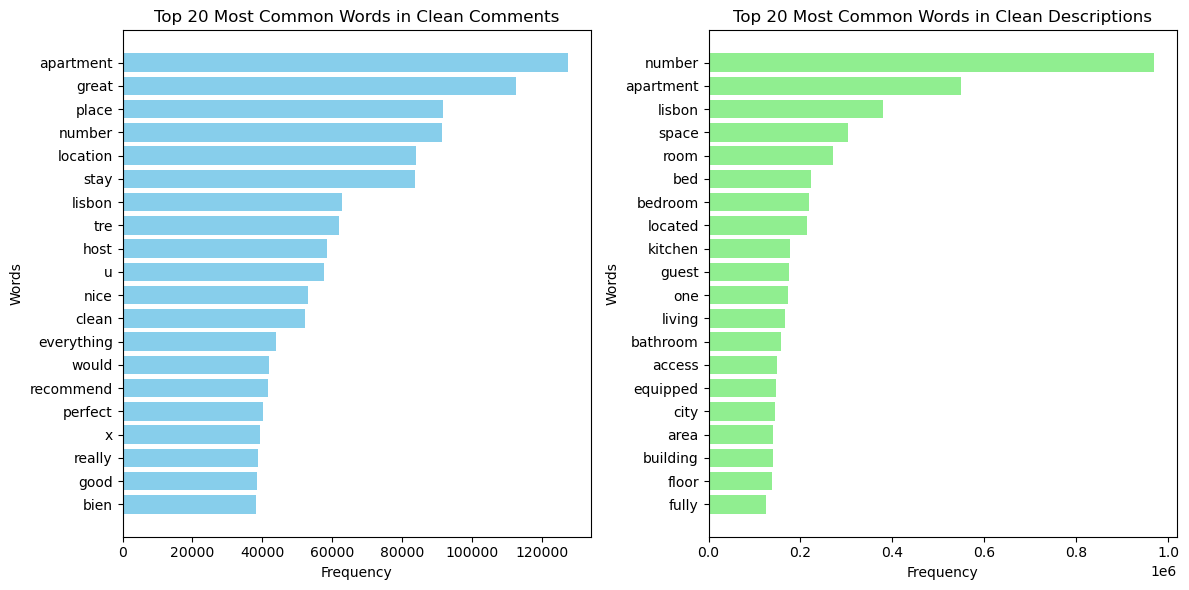

In [17]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK data files (only needed once)
nltk.download('punkt')

# Assuming X_train_clean is your DataFrame

# Tokenize the text and count the word frequencies for 'clean_comments'
all_words_comments = word_tokenize(' '.join(X_train_clean_preprocessed['clean_comments'].astype(str)))
word_freq_comments = Counter(all_words_comments)
common_words_comments = word_freq_comments.most_common(20)
words_comments, counts_comments = zip(*common_words_comments)

# Tokenize the text and count the word frequencies for 'clean_description'
all_words_description = word_tokenize(' '.join(X_train_clean_preprocessed['clean_description'].astype(str)))
word_freq_description = Counter(all_words_description)
common_words_description = word_freq_description.most_common(20)
words_description, counts_description = zip(*common_words_description)

# Create the bar plot for 'clean_comments'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(words_comments, counts_comments, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words in Clean Comments')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top

# Create the bar plot for 'clean_description'
plt.subplot(1, 2, 2)
plt.barh(words_description, counts_description, color='lightgreen')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words in Clean Descriptions')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top

plt.tight_layout()
plt.show()

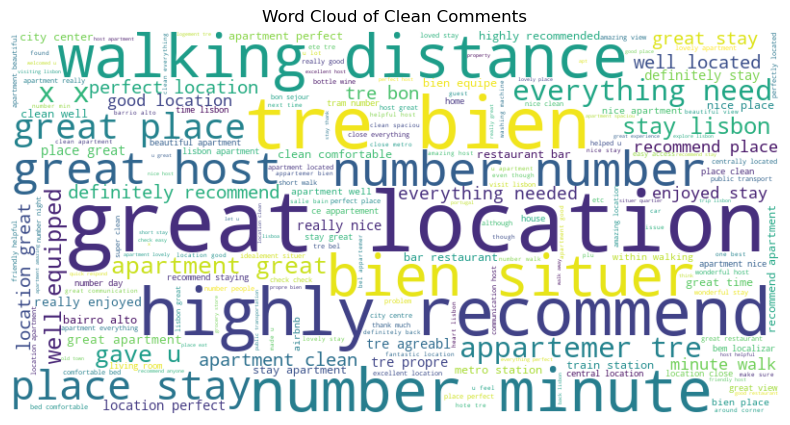

In [713]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt




all_comments = ' '.join(X_train_clean_preprocessed['clean_comments'].astype(str))


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Clean Comments')
plt.show()

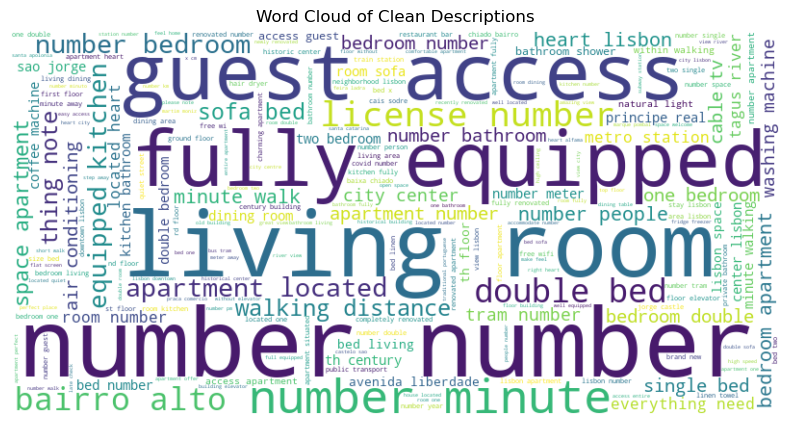

In [714]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_descriptions = ' '.join(X_train_clean_preprocessed['clean_description'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Clean Descriptions')
plt.show()

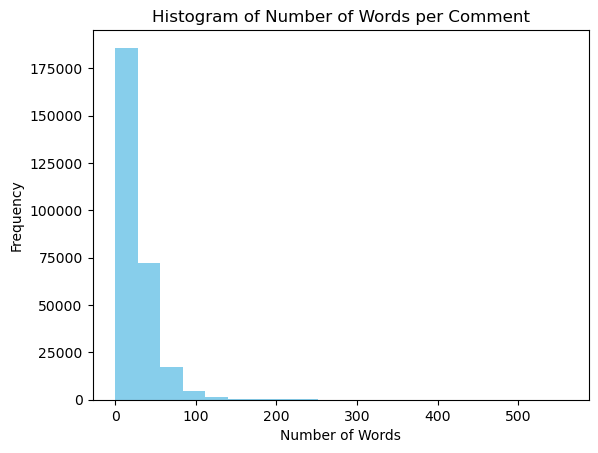

In [715]:
import matplotlib.pyplot as plt

# Calculate the number of words per comment
num_words = X_train_clean_preprocessed['clean_comments'].apply(lambda x: len(x.split()))

# Create the histogram
plt.hist(num_words, bins=20, color='skyblue')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words per Comment')
plt.show()


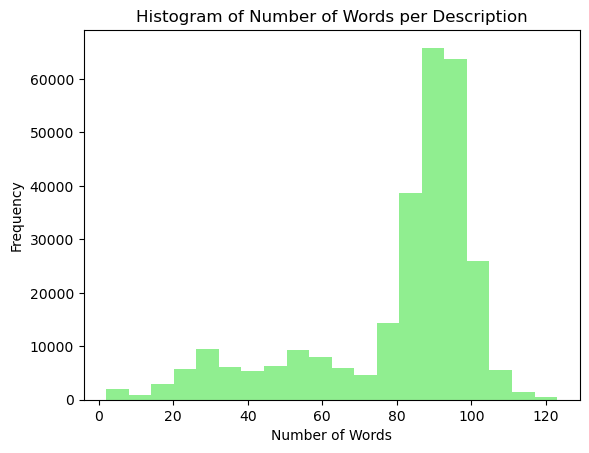

In [716]:
num_words_description = X_train_clean_preprocessed['clean_description'].apply(lambda x: len(x.split()))

# Create the histogram
plt.hist(num_words_description, bins=20, color='lightgreen')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words per Description')
plt.show()


In [966]:
unlisted_percentage = y_train['unlisted'].value_counts(normalize=True) * 100
print(unlisted_percentage)


0    95.766513
1     4.233487
Name: unlisted, dtype: float64


In [967]:
unlisted_percentage_val = y_val['unlisted'].value_counts(normalize=True) * 100
print(unlisted_percentage_val)

0    95.764319
1     4.235681
Name: unlisted, dtype: float64


# Feature Engineering 

In [18]:
# Group y_train by house_nr
y_train = y_train.set_index('houseID')
# Group y_val by house_nr
y_val = y_val.set_index('houseID')
# Set the X_train index as the house_nr
X_train_clean_preprocessed.set_index('houseID', inplace=True)
# Set the X_valid index as the house_nr
X_val_clean_preprocessed.set_index('houseID', inplace=True)

In [19]:
X_train_clean_preprocessed.shape, X_val_clean_preprocessed.shape, y_train.shape, y_val.shape

((282911, 6), (70638, 6), (282911, 1), (70638, 1))

In [20]:
X_train_clean_preprocessed

,description,description_language,comments,comment_language,clean_comments,clean_description
houseID,,,,,,
5469,This perfect and bright House is located in th...,en,Great private space in an ideal location.,en,great private space ideal location,perfect bright house located historical center...
1101,This sunny and cozy apartment is located in th...,en,"Foi uma ótima ótima estadia, lugar excelente e...",pt,otim otima estadia lugar excelente anfitr supe...,sunny cozy apartment located center lisbon nea...
4254,"Lisbon, Alfama, Praça do Comércio - Very centr...",en,Location makes it a great hub to see the city....,en,location make great hub see city close transit...,lisbon alfama praca comercio central two bedro...
3804,"Huge 9-bedroom, 10-bathroom property with priv...",en,Ricarlo and Elena was very helpful throughout ...,en,ricarlo elena helpful throughout stay apartmen...,huge number bedroom number bathroom property p...
4667,"Our home is next to a Subway Station, just 1 m...",en,Atendimento 5 estrelas . Apto muito bom e com ...,pt,atendimento number estrela apto bom certeza bo...,home next subway station number walk quiet zon...
...,...,...,...,...,...,...
898,This charming big apartment is totally refurbi...,en,Nice room with a big living area. Really clean...,en,nice room big living area really clean nice ki...,charming big apartment totally refurbished num...
2784,Allow yourself to stay in his living like a lo...,en,Susana was a great host and made Check in and ...,en,susana great host made check check incredibly ...,allow stay living like local apartment located...
2157,"<b>The space</b><br />In the apartment, you wo...",en,C'était parfait .<br/>Emplacement idéal et cal...,fr,eter parfaire emplacement ideal calme hauteur ...,space apartment hear four kind sound horn ship...


In [21]:

y_train

,unlisted
houseID,
5469,0
1101,0
4254,0
3804,0
4667,0
...,...
898,1
2784,0
2157,0


As we've already seen , the target is quiet unbalanced, so we'll try to balance it doing smote

In [22]:
y_train

,unlisted
houseID,
5469,0
1101,0
4254,0
3804,0
4667,0
...,...
898,1
2784,0
2157,0


Before feature engineering we have to combine the text from clean comments and descriptions before fitting count vectorizer for example

In [23]:
X_train_clean_preprocessed["description_and_comments"] = X_train_clean_preprocessed['clean_comments'] + " " + X_train_clean_preprocessed['clean_description']
X_val_clean_preprocessed["description_and_comments"] = X_val_clean_preprocessed['clean_comments'] + " " + X_val_clean_preprocessed['clean_description']



In [24]:
X_train_clean_preprocessed

,description,description_language,comments,comment_language,clean_comments,clean_description,description_and_comments
houseID,,,,,,,
5469,This perfect and bright House is located in th...,en,Great private space in an ideal location.,en,great private space ideal location,perfect bright house located historical center...,great private space ideal location perfect bri...
1101,This sunny and cozy apartment is located in th...,en,"Foi uma ótima ótima estadia, lugar excelente e...",pt,otim otima estadia lugar excelente anfitr supe...,sunny cozy apartment located center lisbon nea...,otim otima estadia lugar excelente anfitr supe...
4254,"Lisbon, Alfama, Praça do Comércio - Very centr...",en,Location makes it a great hub to see the city....,en,location make great hub see city close transit...,lisbon alfama praca comercio central two bedro...,location make great hub see city close transit...
3804,"Huge 9-bedroom, 10-bathroom property with priv...",en,Ricarlo and Elena was very helpful throughout ...,en,ricarlo elena helpful throughout stay apartmen...,huge number bedroom number bathroom property p...,ricarlo elena helpful throughout stay apartmen...
4667,"Our home is next to a Subway Station, just 1 m...",en,Atendimento 5 estrelas . Apto muito bom e com ...,pt,atendimento number estrela apto bom certeza bo...,home next subway station number walk quiet zon...,atendimento number estrela apto bom certeza bo...
...,...,...,...,...,...,...,...
898,This charming big apartment is totally refurbi...,en,Nice room with a big living area. Really clean...,en,nice room big living area really clean nice ki...,charming big apartment totally refurbished num...,nice room big living area really clean nice ki...
2784,Allow yourself to stay in his living like a lo...,en,Susana was a great host and made Check in and ...,en,susana great host made check check incredibly ...,allow stay living like local apartment located...,susana great host made check check incredibly ...
2157,"<b>The space</b><br />In the apartment, you wo...",en,C'était parfait .<br/>Emplacement idéal et cal...,fr,eter parfaire emplacement ideal calme hauteur ...,space apartment hear four kind sound horn ship...,eter parfaire emplacement ideal calme hauteur ...


In [25]:
X_train_description_and_comments = X_train_clean_preprocessed.drop(['clean_comments', 'clean_description', 'description', 'description_language', 'comments', 'comment_language'], axis=1)

In [26]:
X_train_description_and_comments

,description_and_comments
houseID,
5469,great private space ideal location perfect bri...
1101,otim otima estadia lugar excelente anfitr supe...
4254,location make great hub see city close transit...
3804,ricarlo elena helpful throughout stay apartmen...
4667,atendimento number estrela apto bom certeza bo...
...,...
898,nice room big living area really clean nice ki...
2784,susana great host made check check incredibly ...
2157,eter parfaire emplacement ideal calme hauteur ...


In [27]:
X_val_description_and_comments = X_val_clean_preprocessed.drop(['clean_comments', 'clean_description', 'description', 'description_language', 'comments', 'comment_language'], axis=1)
print(X_val_description_and_comments)

                                  description_and_comments
houseID                                                   
946      appartemer bien agence lumineux tr bien place ...
2957     location could better would number number stay...
2577     tre beau condo pre tout recommander condo part...
4566     antonio fabulous host even meeting u number nu...
2376     really cute air bnb heart lisboa air bnb reall...
...                                                    ...
2584     pleasure bruno guest apartment clean plenty ro...
5900     partner stayed tiago place two month worked ho...
4582     flat even better description spacious two u be...
3111     may probably best apartment stayed airbnb nice...
3696     location perfect everything need around corner...

[70638 rows x 1 columns]


## Bag of Words

In [28]:
X_train_description_and_comments_bow = X_train_description_and_comments.copy()
X_val_description_and_comments_bow = X_val_description_and_comments.copy()

y_train_bow = y_train.copy()
y_val_bow = y_val.copy()


In [30]:
from sklearn.feature_extraction.text import CountVectorizer


In [31]:
bow= CountVectorizer(binary=True)
X_train_description_and_comments_bow = bow.fit_transform(X_train_description_and_comments['description_and_comments'])
X_val_description_and_comments_bow = bow.transform(X_val_description_and_comments['description_and_comments'])

y_train_bow = np.array(y_train_bow)
y_val_bow = np.array(y_val_bow)

In [32]:
#apply smote

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_description_and_comments_bow_smote, y_train_bow_smote= smote.fit_resample(X_train_description_and_comments_bow, y_train_bow)

X_train_description_and_comments_bow_smote.shape, y_train_bow_smote.shape



((541868, 99142), (541868,))

In [33]:
class_counts = np.bincount(y_train_bow_smote)
class_counts


array([270934, 270934])

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Without SMOTE
logreg = LogisticRegression()
logreg.fit(X_train_description_and_comments_bow, y_train_bow)

y_train_pred = logreg.predict(X_train_description_and_comments_bow)
y_val_pred = logreg.predict(X_val_description_and_comments_bow)

train_accuracy = accuracy_score(y_train_bow, y_train_pred)
val_accuracy = accuracy_score(y_val_bow, y_val_pred)

print("Without SMOTE:")
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# With SMOTE
logreg_smote = LogisticRegression()
logreg_smote.fit(X_train_description_and_comments_bow_smote, y_train_bow_smote)

y_train_pred_smote = logreg_smote.predict(X_train_description_and_comments_bow_smote)
y_val_pred_smote = logreg_smote.predict(X_val_description_and_comments_bow)

train_accuracy_smote = accuracy_score(y_train_bow_smote, y_train_pred_smote)
val_accuracy_smote = accuracy_score(y_val_bow, y_val_pred_smote)

print("With SMOTE:")
print("Train Accuracy:", train_accuracy_smote)
print("Validation Accuracy:", val_accuracy_smote)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Without SMOTE:
Train Accuracy: 0.9994203123950641
Validation Accuracy: 0.9974942665420878


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


With SMOTE:
Train Accuracy: 0.9991843031882304
Validation Accuracy: 0.9959795011183782


In [35]:
from sklearn.metrics import classification_report

# Without SMOTE
classification_report_without_smote = classification_report(y_val_bow, y_val_pred)

# With SMOTE
classification_report_with_smote = classification_report(y_val_bow, y_val_pred_smote)

print("Without SMOTE:")
print(classification_report_without_smote)

print("With SMOTE:")
print(classification_report_with_smote)


Without SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67646
           1       0.98      0.96      0.97      2992

    accuracy                           1.00     70638
   macro avg       0.99      0.98      0.98     70638
weighted avg       1.00      1.00      1.00     70638

With SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67646
           1       0.95      0.96      0.95      2992

    accuracy                           1.00     70638
   macro avg       0.97      0.98      0.98     70638
weighted avg       1.00      1.00      1.00     70638



## TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tfidf = TfidfVectorizer()

In [12]:
X_train_tfidf = tfidf.fit_transform(X_train_clean["clean_comments"])

In [13]:
df_tfidf = pd.DataFrame(X_train_tfidf[0].T.todense(), index=tfidf.get_feature_names(), columns=["TF-IDF"])

df_tfidf = df_tfidf.sort_values('TF-IDF', ascending=False)

In [14]:
df_tfidf.head(10)

,TF-IDF
hosters,0.322032
identical,0.295419
very,0.242714
thanks,0.241550
mum,0.241120
presence,0.235828
smile,0.221642
david,0.204919
hosting,0.200949
present,0.194190


## GloVe Embeddings

In [22]:
import gensim.downloader as api

In [23]:
model = api.load("glove-wiki-gigaword-300")

[===-----------------------------------------------] 7.5% 28.4/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 16.6% 62.3/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 26.4% 99.3/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.6% 133.9/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 45.7% 171.7/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 56.6% 212.8/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.0% 251.8/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================================------------] 76.6% 288.2/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================================-------] 87.5% 329.0/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 98.2% 369.3/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
def apply_glove_embeddings(text):
    words = text.split()
    embeddings = [model[word] if word in model else np.zeros(model.vector_size)
                  for word in words]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

In [25]:
X_train_embeddings = np.array([apply_glove_embeddings(text) for text in X_train_clean])

In [27]:
# é suposto aplicar isto ao val e ao test?

## Word Embedding with Word2Vec

In [315]:
#!pip install gensim nltk


In [316]:
from gensim.models import Word2Vec

In [317]:
model_word2vec = Word2Vec(sentences=X_train_clean["clean_comments"], vector_size=100, window=5, min_count=0, workers=4)

In [318]:
X_train_clean["clean_comments"]

0         very good stay and trip to lisbon x d the apar...
1         beautiful spot incredible setting and view lov...
2         thank you for making u feel very welcome charl...
3         que de compliment tres bon accueil appart ultr...
4         great location and perfect flat for two terass...
                                ...                        
282310    logement conforme a la description vraiment tr...
282311    great location stylish apartment with many ame...
282312    we had a great time at william s flat he wa ve...
282313                       i highly recommend this hostel
282314    da apartment war einfach super schon und auch ...
Name: clean_comments, Length: 282315, dtype: object

In [319]:
print(model_word2vec.wv.key_to_index.keys())

dict_keys([' ', 'e', 'a', 't', 'o', 'n', 'i', 'r', 's', 'l', 'd', 'h', 'u', 'c', 'm', 'p', 'y', 'g', 'w', 'f', 'b', 'v', 'k', 'x', 'q', 'j', 'z', 'N', 'U', 'M', 'B', 'E', 'R'])


In [320]:
word_vector = model_word2vec.wv['document']
print("Vector for 'document':", word_vector)

similar_words = model_word2vec.wv.most_similar('document')
print("Most similar words to 'document':", similar_words)

KeyError: "Key 'document' not present"